<a href="https://colab.research.google.com/github/iRoseM/Freelancing-Trends--IT362/blob/main/IT362_groub_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analyzing Freelancing Trends and Sustainability**

## **1. Introduction:**
Freelancing has become a popular career path due to its flexibility and the opportunities it provides across various fields. However, several questions arise regarding its sustainability, income stability, and the demographics of those engaging in this type of work. Understanding freelancing trends can help clarify whether freelancing is a sustainable career choice, identify income patterns, and determine the demographics of freelancers, such as  examining whether freelancing is a sustainable career path, identifying countries with the highest concentration of skilled freelancers and more.


## **1.	Data Sources:**


**Primary dataset** is sourced through using web scraping method on [freelancer.com](https://www.freelancer.com) website. Web scraping is a technique for extracting unstructured data from websites, enabling efficient large-scale data collection.

The main tool used for scraping is BeautifulSoup.

### - Printing HTML structure to easily navigate the code

In [69]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import random
from IPython.core.display import display, HTML
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize



# Collect and parse first page
response = requests.get('https://www.freelancer.com/freelancers/1')
print(response.status_code)

soup = BeautifulSoup(response.text, 'html.parser')
print (soup.prettify())



200
<!DOCTYPE html>
<html class="is-responsive is-mobile-first" lang="en">
 <head>
  <!-- Critical path meta tags only -->
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <meta content="en" http-equiv="Content-Language"/>
  <meta content="on" http-equiv="x-dns-prefetch-control"/>
  <meta content="width=device-width, initial-scale=1.0" name="viewport">
   <title>
    Freelancers For Hire | Freelancer
   </title>
   <link crossorigin="" href="//www.f-cdn.com" rel="preconnect"/>
   <link href="//cdn2.f-cdn.com" rel="dns-prefetch"/>
   <link href="//cdn3.f-cdn.com" rel="dns-prefetch"/>
   <link href="//cdn4.f-cdn.com" rel="dns-prefetch"/>
   <link href="//cdn5.f-cdn.com" rel="dns-prefetch"/>
   <link href="//cdn6.f-cdn.com" rel="dns-prefetch"/>
   <!-- Google Experiment. ga_exp.js is special, don't include any script in the head! -->
   <!-- Font face handling for an FOFT rendering approach -->
   <style>
    @font-face {
          font-family: 'RobotoSubset';
    

#### - Data retrieval
We extracted data by scraping the website's HTML elements, targeting specific tags to retrieve the relevant information.

In [70]:
num_pages = 100
base_url = "https://www.freelancer.com/freelancers/"

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
}

data = []

random_page_numbers = random.sample(range(1, 700), num_pages)

for page in random_page_numbers:
    url = f"{base_url}{page}"
    response = requests.get(url, headers=headers)

    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')
        freelancers = soup.find_all('div', class_='directory-freelancer-item-container')

        for freelancer in freelancers:
            name = freelancer.find('a', class_='find-freelancer-username')
            name = name.text.strip() if name else 'N/A'

            hourly_rate = freelancer.find('span', class_='user-hourly-rate freelancer-hourlyrate')
            hourly_rate = hourly_rate.text.strip() if hourly_rate else 'N/A'

            skills = [skill.text.strip() for skill in freelancer.find_all('a', style='color:black;')]
            skills = ', '.join(skills) if skills else 'N/A'

            location = freelancer.find('div', class_='user-location')
            location = location.text.strip() if location else 'N/A'

            bio = freelancer.find('div', class_='bio cleanProfile')
            bio = bio.text.strip() if bio else 'N/A'

            rating_tag = freelancer.find('span', class_='Rating Rating--labeled')
            rating = rating_tag.get('data-star_rating', 'N/A') if rating_tag else 'N/A'

            earnings = freelancer.find('div', class_='Earnings')
            earnings = earnings.text.strip() if earnings else 'N/A'

            reviews_tag = freelancer.find('a', class_='directory-freelancer-rating-mobile')
            if reviews_tag:
                reviews_text = reviews_tag.text.strip()
                reviews = reviews_text.split(' ')[0] if 'reviews' in reviews_text else 'N/A'
            else:
                reviews = 'N/A'

            data.append({
                'Freelancer Name': name,
                'Hourly Rate': hourly_rate,
                'Skills': skills,
                'Location': location,
                'Rating': rating,
                'Reviews': reviews,
                'Total Earnings': earnings,
                'Bio': bio
            })
    else:
        print(f"Failed to retrieve page {page}, status code: {response.status_code}")

# Load the dataset
df = pd.read_csv("https://raw.githubusercontent.com/iRoseM/Freelancing-Trends--IT362/main/Dataset/Raw_Dataset.csv")

print(df.head())

  Freelancer Name       Hourly Rate  \
0        artdjuna  $30 USD per hour   
1      kkwebart09  $15 USD per hour   
2        enervell  $50 USD per hour   
3   sharminnaharm  $10 USD per hour   
4        ancineha  $15 USD per hour   

                                              Skills    Location  Rating  \
0  Logo Design, Photoshop, Illustration, Corporat...   Indonesia     4.9   
1  Graphic Design, Photoshop Design, Logo Design,...       India     4.9   
2    Node.js, AngularJS, PostgreSQL, JavaScript, PHP    Colombia     5.0   
3  Logo Design, Graphic Design, Photoshop, Illust...  Bangladesh     4.9   
4  Graphic Design, Website Design, User Interface...       India     5.0   

   Reviews  Total Earnings                                                Bio  
0    171.0             8.3  Trying to do the best I can and will make my c...  
1     17.0             6.4  I'm a professional web designer and web develo...  
2     27.0             6.3  I am a seasoned Full Stack Developer wit

### **2. Dataset Overview:**
This section summarizes the dataset, and introduce some basic information about our dataset, such as its size, head, and null values, data types.

#### - Dataset size
Our dataset have 1000 rows and 8 columns, where each row in the dataset represents a freelancer experience, with columns detailing their relevant characteristics.

In [71]:
# number of rows and columns
df.shape

(1000, 8)

#### - Dataset general information



In [72]:
# print main dataset info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Freelancer Name  1000 non-null   object 
 1   Hourly Rate      1000 non-null   object 
 2   Skills           996 non-null    object 
 3   Location         1000 non-null   object 
 4   Rating           1000 non-null   float64
 5   Reviews          939 non-null    float64
 6   Total Earnings   1000 non-null   float64
 7   Bio              1000 non-null   object 
dtypes: float64(3), object(5)
memory usage: 62.6+ KB
None


| Column Name      | Description                                   | Data Type | Possible Values                                  |
|------------------|-----------------------------------------------|-----------|--------------------------------------------------|
| Freelancer Name  | The name of the freelancer, used to personalize their profile on the platform.                        | Object    | String values representing freelancer names      |
| Hourly Rate      | The amount a freelancer charges per hour of work.             | Object    | String (e.g., "$25", "N/A")                      |
| Skills           |  A list of specific abilities, expertise, or proficiencies that a freelancer possesses (e.g., graphic designer, video editor.. etc). | Object    | Comma-separated string of skills or "N/A"        |
| Location         | The freelancer's country of residence or work (e.g., Lebanon, UK.. etc).                    | Object    | String (e.g., "New York", "N/A")                 |
| Rating          | The average rating given to the freelancer based on client reviews and feedback.             | Object    |String (e.g., "4.5", "N/A")                |
| Reviews          | The number of feedback received from clients reflecting a freelancer's performance and quality of work.             | Object    | String (e.g., "5 reviews", "N/A")                |
| Total Earnings              | The Earnings Score represents a freelancer’s overall earnings from the projects and contests they have successfully completed on the site.               | Object    | String (e.g., "7.8", "N/A") |
| Bio              | A brief description written by the freelancer outlining his/her background, experience, and professional journey.               | Object    | String (e.g., "Experienced software developer", "N/A") |

 **As shown in code**, all columns are of the "object" data type, which means that the column contains mixed data types. This includes freelancer names, hourly rates, skills, locations, reviews, and bios.

#### - Number of missing values
As shown below, the number of null values is 0 for all attributes, except for 'Skills' (4 missing values) and 'Reviews' (61 missing values). This means that we have missing data in these two columns. Therefore, we may need to handle these missing values by filling them with appropriate values or deciding whether to drop them, depending on the analysis requirements.

In [73]:
# Number of missing value in the dataset
df.replace(["N/A"], pd.NA, inplace=True)
df.isnull().sum()

,0
Freelancer Name,0
Hourly Rate,0
Skills,4
Location,0
Rating,0
Reviews,61
Total Earnings,0
Bio,0


#### - Number of duplicates

In [74]:
# Number of duplicated rows
print("Total number of duplicated rows: " + str(sum(df.duplicated(subset=['Freelancer Name'], keep=False))))


Total number of duplicated rows: 104


In [75]:
df[df['Freelancer Name'].duplicated(keep=False)]


,Freelancer Name,Hourly Rate,Skills,Location,Rating,Reviews,Total Earnings,Bio
14,takacstamas,$15 USD per hour,"3D Design, 3D Logo, Graphic Design, Logo Design",Hungary,0.0,0.0,0.0,"I am able to design logos, leaflets, posts for..."
15,dikshra,$15 USD per hour,"Adobe Illustrator, Adobe XD, CSS, Digital Mark...",India,0.0,0.0,0.0,"Hi, my name is Diksha, and I started working a..."
16,itsSabbirHere,$10 USD per hour,"Graphic Design, Illustrator, Photoshop, Video ...",Bangladesh,0.0,0.0,0.0,"Hi there! I'm Mohammed Sabbir, and I'm thrille..."
17,B2BLeadFinder,$5 USD per hour,"B2B Marketing, CRM, Customer Support, Data Cle...",Bangladesh,0.0,0.0,0.0,"My name is Shibbir, and I am a B2B lead genera..."
21,ahmadaskar,$20 USD per hour,"Excel, Data Processing, Arabic Translator, Dat...",Egypt,5.0,2.0,2.1,MS Power Query ETL Extract Transform and Load....
...,...,...,...,...,...,...,...,...
937,karishma03,$20 USD per hour,"3D Animation, 3D Modelling, 3D Rendering, App ...",India,0.0,0.0,0.0,I am a freelancer and have an in-house team wi...
950,decipherzone111,$15 USD per hour,"Java, JavaScript, HTML, PHP, Website Design",India,5.0,3.0,4.1,##REACHING AMONG THE TOP 1% DEVELOPMENT TEAM O...
951,rana4485,$10 USD per hour,"Graphic Design, Logo Design, Photoshop, Illust...",Bangladesh,4.5,12.0,4.2,"Hi,and welcome to my account. My name is Md Ra..."
952,MattScottDev,$75 USD per hour,"C Programming, Java, Python, Figma, Graphic De...",United Kingdom,5.0,NaN,4.1,With 15 years of experience in building digita...


As shown in above output, there are 104 duplicated rows. After reviewing the duplicates, we found that the 'Freelancer Name' which represents the unique username, was repeated. Therefore, in the preproccesing stage we’re going to  drop the duplicate rows to ensure data consistency while keeping only the first occurrence, as having duplicate primary keys could lead to issues with data integrity and the accurate identification of users.

### **3. Data Pre-processing:**


### 1. Data cleaning

Data cleaning is essential for accurate analysis.

We will perform the following steps:
- Handling missing values
- Removing duplicates[link text](https://)

#### - Handling missing values
Missing values can lead to incorrect analysis and inconsistencies in the dataset. To ensure data quality and preserve useful information, we:

* Filled missing Skills with "Unknown"

 Some freelancers may have skills listed in their bio instead of the "Skills" column. To avoid losing valuable data, we label these entries as "Unknown", ensuring all freelancers remain in the dataset.

* Set Reviews to 0 where Rating is 0

  As observed on the Freelancer website, the number of reviews represents the count of individuals who provided a rating. Therefore, a freelancer with no rating likely has no reviews. Setting the reviews to 0 ensures consistency between the "Rating" and "Reviews" columns.


* Filled remaining missing Reviews with the median

 Some freelancers have ratings but missing reviews. Instead of assuming they have none, we use the median to prevent data distortion while preserving accuracy.




In [76]:
print("\n Missing values before handling:")
print(df.isnull().sum())

# Fill missing Skills with "Unknown"
if df["Skills"].isnull().sum() > 0:
    df["Skills"] = df["Skills"].fillna("Unknown")

if df["Reviews"].isnull().sum() > 0:
    df["Reviews"] = pd.to_numeric(df["Reviews"], errors="coerce")

    # If Rating is 0, set Reviews to 0
    df.loc[df["Rating"] == 0, "Reviews"] = 0

    # Fill remaining missing Reviews with the median
    reviews_median = df["Reviews"].median()
    df["Reviews"] = df["Reviews"].fillna(reviews_median)

print("\n Missing values after handling:")
print(df.isnull().sum())

print("\n Sample Rows After Handling Missing Values:")
display(df.head())



 Missing values before handling:
Freelancer Name     0
Hourly Rate         0
Skills              4
Location            0
Rating              0
Reviews            61
Total Earnings      0
Bio                 0
dtype: int64

 Missing values after handling:
Freelancer Name    0
Hourly Rate        0
Skills             0
Location           0
Rating             0
Reviews            0
Total Earnings     0
Bio                0
dtype: int64

 Sample Rows After Handling Missing Values:


,Freelancer Name,Hourly Rate,Skills,Location,Rating,Reviews,Total Earnings,Bio
0,artdjuna,$30 USD per hour,"Logo Design, Photoshop, Illustration, Corporat...",Indonesia,4.9,171.0,8.3,Trying to do the best I can and will make my c...
1,kkwebart09,$15 USD per hour,"Graphic Design, Photoshop Design, Logo Design,...",India,4.9,17.0,6.4,I'm a professional web designer and web develo...
2,enervell,$50 USD per hour,"Node.js, AngularJS, PostgreSQL, JavaScript, PHP",Colombia,5.0,27.0,6.3,I am a seasoned Full Stack Developer with over...
3,sharminnaharm,$10 USD per hour,"Logo Design, Graphic Design, Photoshop, Illust...",Bangladesh,4.9,138.0,6.8,"Hello everyone! As-salamu alaykum,\n\nThis is ..."
4,ancineha,$15 USD per hour,"Graphic Design, Website Design, User Interface...",India,5.0,71.0,7.7,"Hello,\n\n⭐I am an expert in website developme..."


#### - Removing duplicates
Duplicate freelancer entries can skew analysis. To ensure accuracy, we:

* Identified duplicate names.
* Removed duplicate rows, keeping only the first occurrence.

This ensures each freelancer is uniquely represented, improving data reliability.

In [77]:
before_dupes = df.shape[0]
df.drop_duplicates(inplace=True)
after_dupes = df.shape[0]

# Print the number of removed duplicates
print(f"Removed {before_dupes - after_dupes} duplicate rows.")

print(f"The dataset now contains {after_dupes} rows and {df.shape[1]} columns.")

Removed 53 duplicate rows.
The dataset now contains 947 rows and 8 columns.


### 2. Text Processing

#### - Word embedding



In this section, we standardized the "Skills" column by first extracting unique words from the dataset and then categorizing the results using a predefined skill mapping dictionary. This process helped identify distinct skills and group them into broader categories such as Design, Development, Marketing, Data Science, Finance, Writing, Management, and Engineering. By organizing skills in this structured manner, we improved dataset consistency, reduced ambiguity, and enhanced usability. This approach simplifies analysis, enables trend identification, and supports data-driven decision-making.

In [78]:

skills_column = df['Skills']

# Tokenize the skills into individual words
all_words = []
for skill in skills_column.dropna():  # Drop NaN values
    words = skill.lower().replace(',', ' ').split()  # Convert to lowercase and split into words
    all_words.extend(words)

# Get unique words
unique_words = set(all_words)

# Print the unique words
print("Unique words in the 'skills' column:")
print(unique_words)

Unique words in the 'skills' column:
{'canva', 'outlook', 'ppc', 'flash', 'pixel', '6', 'resumes', 'autodesk', 'programming', 'opengl', 'ipad', 'bi', 'chat', 'format', 'visualization', 'couch', 'video', 'php', 'langchain', 'core', 'prototype', 'frontend', 'optimization', 'layout', 'documentation', 'building', 'indesign', 'postgresql', 'css3', 'flyer', 'grammar', 'concept', 'helpdesk', 'medical', 'application', 'proofreading', 'youtube', '(us)', 'cakephp', 'law', 'stack', 'bengali', 'xd', 'chinese', 'wiki', 'care', 'production', 'ajax', 'server', 'photo', 'mechanical', 'batteries', 'marketing', 'text-to-video', 'delphi', 'capabilities', 'elasticsearch', 'altium', 'j2ee', 'flask', 'ebooks', 'photography', 'accounting', '&', 'listings', 'designer', 'matlab', '4', 'mood', 'database', 'profile', 'word', 'achievement', 'mvc', 'sketchup', 'psd', 'html5', 'alarm', 'blog', 'vectorization', 'java', 'battery', 'fastapi', 'devops', 'react', 'covers', 'javascript', 'dutch', 'cv', 'cryptocurrency', 

In [79]:
import pandas as pd
!pip install fuzzywuzzy
from fuzzywuzzy import fuzz
from nltk.stem import WordNetLemmatizer
import nltk

# Download NLTK resources (if not already downloaded)
nltk.download('wordnet')
nltk.download('omw-1.4')


# Initialize lemmatizer for better synonym matching
lemmatizer = WordNetLemmatizer()

# Define skill category mapping with expanded synonyms
skill_mapping = {
    "Design": [
        "Illustrator", "Photoshop", "InDesign", "Figma", "Canva", "Branding", "Logo Design", "UI/UX",
        "Wireframing", "Prototyping", "Graphic Design", "Typography", "Animation", "Digital Design",
        "Print Design", "Banner Design", "Flyer Design", "Poster Design", "Business Card Design",
        "3D Design", "Illustration", "Vectorization", "Painting", "Drawing", "Watercolor", "Concept Art",
        "Adobe Suite", "Web Design", "Interior Design", "Rendering", "Stationery Design", "Book Cover Design"
    ],
    "Development": [
        "Python", "Java", "C++", "C#", "JavaScript", "PHP", "Django", "Flask", "React.js", "Vue.js", "Node.js",
        "Angular", "Swift", "Kotlin", "ASP.NET", "SQL", "MongoDB", "PostgreSQL", "MySQL", "NoSQL", "Firebase",
        "RESTful APIs", "GraphQL", "Docker", "Kubernetes", "Linux", "Bash", "Git", "CI/CD", "DevOps", "Software Development",
        "Web Development", "Full Stack Development", "Frontend Development", "Backend Development", "Mobile App Development",
        "iOS Development", "Android Development", "Flutter", "Game Development", "Unity", "Unreal Engine", "AI/ML", "Chatbots",
        "Machine Learning", "Deep Learning", "Data Mining", "Big Data", "Blockchain", "Cryptocurrency", "Arduino", "Raspberry Pi"
    ],
    "Marketing": [
        "SEO", "Google Ads", "Facebook Ads", "Instagram Marketing", "LinkedIn Marketing", "Content Marketing",
        "Affiliate Marketing", "Email Marketing", "Social Media Marketing", "Digital Marketing", "Brand Promotion",
        "Campaign Management", "Marketing Strategy", "PPC", "Advertising", "Copywriting", "Market Research", "E-commerce Marketing"
    ],
    "Finance": [
        "Accounting", "Bookkeeping", "Financial Analysis", "Auditing", "Taxation", "Payroll", "Budgeting",
        "Financial Modeling", "QuickBooks", "Xero", "Investment Analysis", "Crypto Trading", "Stock Market", "Banking"
    ],
    "Engineering": [
        "Mechanical Engineering", "Electrical Engineering", "Civil Engineering", "Structural Engineering", "Automotive Engineering",
        "CAD", "CAM", "SolidWorks", "AutoCAD", "3D Modeling", "PCB Design", "Firmware", "Embedded Systems", "FPGA", "I2C", "SPI",
        "MATLAB", "Simulink", "Control Systems", "IoT", "Robotics"
    ],
    "Writing & Translation": [
        "Content Writing", "Blog Writing", "Technical Writing", "Copywriting", "Ghostwriting", "Proofreading", "Editing",
        "Academic Writing", "Resume Writing", "Cover Letter Writing", "Translation", "Transcription", "Subtitling", "Creative Writing",
        "E-books", "Fiction Writing", "Article Writing"
    ],
    "Business & Management": [
        "Project Management", "Business Analysis", "Consulting", "Recruiting", "HR", "Customer Support", "Business Strategy",
        "Operations Management", "Entrepreneurship", "Supply Chain Management", "Team Leadership", "Startup Development", "Lean Startup"
    ],
    "IT & Networking": [
        "Networking", "Cloud Computing", "AWS", "Azure", "Google Cloud", "Cybersecurity", "Penetration Testing", "Ethical Hacking",
        "Database Management", "System Administration", "Linux", "Windows Server", "DevOps", "IT Support", "Technical Support"
    ],
    "Data & Analytics": [
        "Data Science", "Data Analysis", "Machine Learning", "Deep Learning", "Big Data", "Data Mining", "Data Visualization",
        "Power BI", "Tableau", "Excel", "SQL", "Python", "R", "SPSS", "Statistical Analysis", "ETL", "AI"
    ],
    "E-commerce & Retail": [
        "E-commerce", "Amazon FBA", "Shopify", "WooCommerce", "Dropshipping", "Etsy", "eBay", "Product Listings",
        "Inventory Management", "Customer Service", "Order Fulfillment"
    ],
    "Healthcare & Science": [
        "Medical Writing", "Healthcare Data Analysis", "Biostatistics", "Pharmaceutical Research", "Neuroscience", "Chemistry",
        "Biology", "Clinical Trials", "Medical Transcription", "Health Informatics", "Nutrition", "Public Health"
    ],
    "Education & Training": [
        "Tutoring", "Online Teaching", "Curriculum Development", "Lesson Planning", "Instructional Design", "E-learning", "Training & Development", "Corporate Training"
    ]
}


# Function to preprocess and lemmatize skills
def preprocess_skill(skill):
    skill = skill.lower().strip()
    # Lemmatize the skill to its base form (e.g., "designing" -> "design")
    return lemmatizer.lemmatize(skill)

# Function to map skills to categories with improved synonym matching
def map_skills(skill_list):
    categorized_skills = set()
    if not skill_list or pd.isna(skill_list):  # Handle empty or NaN values
        return "Other"

    # Tokenize skills by commas, semicolons, or slashes
    skills = [preprocess_skill(s) for s in skill_list.replace(";", ",").replace("/", ",").split(",")]

    for skill in skills:
        if not skill:  # Skip empty strings
            continue

        # Check for direct matches or synonyms
        matched = False
        for category, keywords in skill_mapping.items():
            for keyword in keywords:
                # Use fuzzy matching for flexibility
                if fuzz.partial_ratio(skill, preprocess_skill(keyword)) > 80:  # Adjust threshold as needed
                    categorized_skills.add(category)
                    matched = True
                    break  # Stop checking other keywords for this category
            if matched:
                break  # Stop checking other categories if a match is found

    return ", ".join(categorized_skills) if categorized_skills else "Other"

# Overwrite the "Skills" column with the categorized skills
df["Skills"] = df["Skills"].astype(str).apply(map_skills)

# Save the modified dataset
df.to_csv("afterSkillEmbedding.csv", index=False)

# Display preview
print(df.head())

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


  Freelancer Name       Hourly Rate  \
0        artdjuna  $30 USD per hour   
1      kkwebart09  $15 USD per hour   
2        enervell  $50 USD per hour   
3   sharminnaharm  $10 USD per hour   
4        ancineha  $15 USD per hour   

                                              Skills    Location  Rating  \
0                           Data & Analytics, Design   Indonesia     4.9   
1                                             Design       India     4.9   
2                                        Development    Colombia     5.0   
3                                             Design  Bangladesh     4.9   
4  Data & Analytics, Design, Engineering, Marketi...       India     5.0   

   Reviews  Total Earnings                                                Bio  
0    171.0             8.3  Trying to do the best I can and will make my c...  
1     17.0             6.4  I'm a professional web designer and web develo...  
2     27.0             6.3  I am a seasoned Full Stack Developer wit

#### - Converting data type

In this step, we preprocess the Hourly Rate column to ensure it is in a numeric format. The raw data includes currency symbols ($), the text "USD", and the phrase "per hour", which need to be removed.

To clean this column, we:

* Extract only numeric values by removing all non-numeric characters.
* Convert the cleaned values into a numeric format to allow for calculations and analysis.

This transformation ensures that we can analyze hourly rates effectively without unnecessary text cluttering the data. The cleaned dataset is then saved for further processing.

In [80]:
import pandas as pd

# Load your dataset (modify the filename if necessary)
df = pd.read_csv("afterSkillEmbedding.csv")  # Replace with your actual file path if needed

# Extract only the numeric part from "Hourly Rate"
df['Hourly Rate'] = df['Hourly Rate'].str.replace(r'[^0-9]', '', regex=True)

# Convert the cleaned "Hourly Rate" column to numeric
df['Hourly Rate'] = pd.to_numeric(df['Hourly Rate'], errors='coerce')

# Save the cleaned dataset
df.to_csv("cleaned_dataset.csv", index=False)

# Display the first few rows to verify
print(df.head())

  Freelancer Name  Hourly Rate  \
0        artdjuna           30   
1      kkwebart09           15   
2        enervell           50   
3   sharminnaharm           10   
4        ancineha           15   

                                              Skills    Location  Rating  \
0                           Data & Analytics, Design   Indonesia     4.9   
1                                             Design       India     4.9   
2                                        Development    Colombia     5.0   
3                                             Design  Bangladesh     4.9   
4  Data & Analytics, Design, Engineering, Marketi...       India     5.0   

   Reviews  Total Earnings                                                Bio  
0    171.0             8.3  Trying to do the best I can and will make my c...  
1     17.0             6.4  I'm a professional web designer and web develo...  
2     27.0             6.3  I am a seasoned Full Stack Developer with over...  
3    138.0        


#### - Text Processing for Bio Column
To improve the text analysis, we applied several processing steps to the 'Bio' column:
- **Tokenized** the text into individual words.
- **Removed non-alphabetic characters** and symbols to clean the text.
- **Converted all words to lowercase** to ensure uniformity.
- **Removed common stopwords** (such as "the", "and", etc.) to focus on the key content.
- **Lemmatized** the remaining words to reduce them to their base forms (e.g., "running" to "run").
- **Removed duplicate words** to avoid redundancy and focus on unique content.
This ensures that only meaningful and standardized words are used, helping improve model performance or text insights.

In [81]:
# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')  # Download wordnet for lemmatization

stop_words = set(stopwords.words('english'))

from nltk.stem import WordNetLemmatizer
import re

# Initialize Lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to process the Bio column
def process_Bio(Bio):
    if pd.isna(Bio):
        return ""

    # Tokenize the text
    words = word_tokenize(Bio)

    # Remove non-alphabetic characters and symbols
    words = [re.sub(r'[^a-zA-Z\s]', '', word) for word in words]

    # Convert words to lowercase
    words = [word.lower() for word in words]

    # Remove stopwords
    filtered_words = [word for word in words if word not in stop_words]

    # Lemmatize the words to their root form
    lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words]

    # Remove duplicate words
    unique_words = list(set(lemmatized_words))

    return " ".join(unique_words)

df['Bio'] = df['Bio'].apply(process_Bio)

# Display sample results
print("\nSample Rows After Processing Bio:")
display(df[['Bio']].head())

# Save the modified dataset
df.to_csv("processed_bio.csv", index=False)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!



Sample Rows After Processing Bio:


,Bio
0,client satisfied trying since make best exper...
1,time available depend development unlimited f...
2,sql focus forefront secure ec enabling field ...
3,focus browse time tool happy clean opportunit...
4,joomla try sentiment click commercial jquery ...


### **4. EDA:**

#### **1- Non-graphical, univariate: statistics**

- Descriptive Statistics

In this step, we compute summary statistics for Hourly Rate, Rating, Reviews, and Total Earnings. These columns were chosen because they provide insights into freelancer pricing, their reputation through ratings and reviews, and their overall earnings. The describe() function provides key metrics such as count, mean, standard deviation, minimum, and maximum values. Additionally, we calculate the median to understand the central value, particularly useful when the data distribution is skewed.

In [82]:
# Compute summary statistics for numerical variables
summary_stats = df[['Hourly Rate', 'Rating', 'Reviews', 'Total Earnings']].describe().T
summary_stats['median'] = df[['Hourly Rate', 'Rating', 'Reviews', 'Total Earnings']].median()

# Compute summary statistics for categorical variables

categorical_summary_df = df.describe(exclude="number")

# Display both summaries
display(summary_stats)
display(categorical_summary_df)

,count,mean,std,min,25%,50%,75%,max,median
Hourly Rate,947.0,26.055966,61.633027,2.0,10.0,20.0,30.0,1411.0,20.0
Rating,947.0,3.270433,2.320866,0.0,0.0,4.9,5.0,5.0,4.9
Reviews,947.0,111.154699,354.220819,0.0,0.0,7.5,64.5,6995.0,7.5
Total Earnings,947.0,3.710665,3.196156,0.0,0.0,3.9,6.6,10.0,3.9


,Freelancer Name,Skills,Location,Bio
count,947,947,947,947
unique,947,114,74,947
top,amanydafrawy4,"Data & Analytics, Development",India,effectively achievable towards problem goal a...
freq,1,127,309,1


We can observe that:

* Numerical Variables:
 - Hourly Rate:
The median hourly rate is 20 dollars, with most freelancers charging between 10 and 30 dollars per hour. The high standard deviation (61.63) indicates significant variation. A few freelancers charge extremely high rates, with a maximum of 1,411 dollars per hour.

 - Rating:
Most freelancers have high ratings, with a median of 4.9. However, some have a rating of 0, suggesting they have not been reviewed. The distribution is bimodal, with peaks at 5.0 and 0.

 - Reviews:
The review count is highly skewed; while the mean is 111, the median is just 7.5. A few top freelancers dominate client feedback, with one receiving up to 6,995 reviews.

 - Total Earnings:
The median total earnings are $3.9, while the maximum is capped at $10. Some freelancers have $0 earnings, indicating they have not completed any projects.


* Categorical Variables:

 - Freelancer Name:
Each freelancer has a unique name, confirming no duplicates in the dataset.

 - Skills:
There are 75 unique skill sets, with "Development, Data Science" being the most common, appearing 150 times, reflecting high demand in these fields.

 - Location:
Freelancers represent 74 different locations, with India leading at 309 freelancers, highlighting its strong freelancing presence.

 - Bio:
Every freelancer has a unique bio. The bio extracts key phrases, simplifying the data while maintaining essential information.

#### **2- Non-graphical, multivariate: correlation**

##### **- Correlation Matrix:**

In this step, we will compute the correlation matrix to analyze the relationships between key variables such as Hourly Rate, Reviews, Rating, and Total Earnings. This helps us understand how strongly these factors are connected and whether any patterns suggest a direct influence of one variable on another.

A high correlation value indicates a strong relationship, while a low or negative correlation suggests little to no connection.

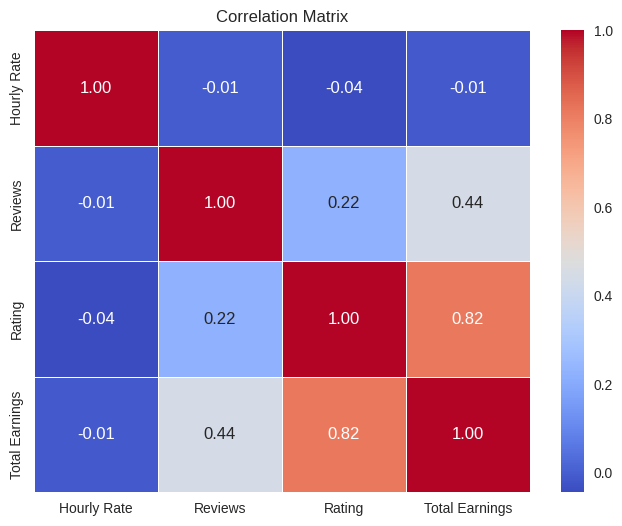

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load dataset (replace 'your_dataset.csv' with actual file name)
df = pd.read_csv("processed_bio.csv")

# Compute correlation matrix
correlation_matrix = df[['Hourly Rate', 'Reviews', 'Rating', 'Total Earnings']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


We can observe that:
1. Strong Positive Correlation: Rating & Total Earnings (0.82)
  * Freelancers with higher ratings tend to have higher total earnings. This suggests that client satisfaction and positive reviews play a significant role in increasing overall earnings.

2. Moderate Positive Correlation: Reviews & Total Earnings (0.44)
  * More reviews are linked to higher total earnings, but the relationship is not as strong as with ratings. This could indicate that having many reviews helps, but the quality of those reviews (ratings) is more influential.
3. Weak Positive Correlation: Reviews & Rating (0.22)
  * There is a slight positive relationship between the number of reviews and the rating, meaning that freelancers with more reviews might have slightly better ratings, but it’s not a strong factor.
4. Negligible Correlation: Hourly Rate & Other Factors (-0.01 to -0.04)
  * Hourly rate does not significantly correlate with total earnings, rating, or reviews. This suggests that charging a higher rate doesn’t necessarily result in higher earnings or better reviews—instead, factors like reputation and work consistency matter more.

**Key Takeaways**

  * High ratings are a strong indicator of success (higher earnings).
  * More reviews contribute to earnings, but quality matters more than quantity.
  * Hourly rate alone is not a strong predictor of total earnings—freelancers should focus on building a strong profile, getting high ratings, and maintaining steady work.

#### **3- Graphical univariate**
These plots analyze one variable at a time, showing distributions or frequencies.

**- Histogram Analysis**


To visualize the distribution of the numerical columns, we plot histograms with Kernel Density Estimation (KDE) enabled. These histograms help in identifying trends, skewness, and outliers.

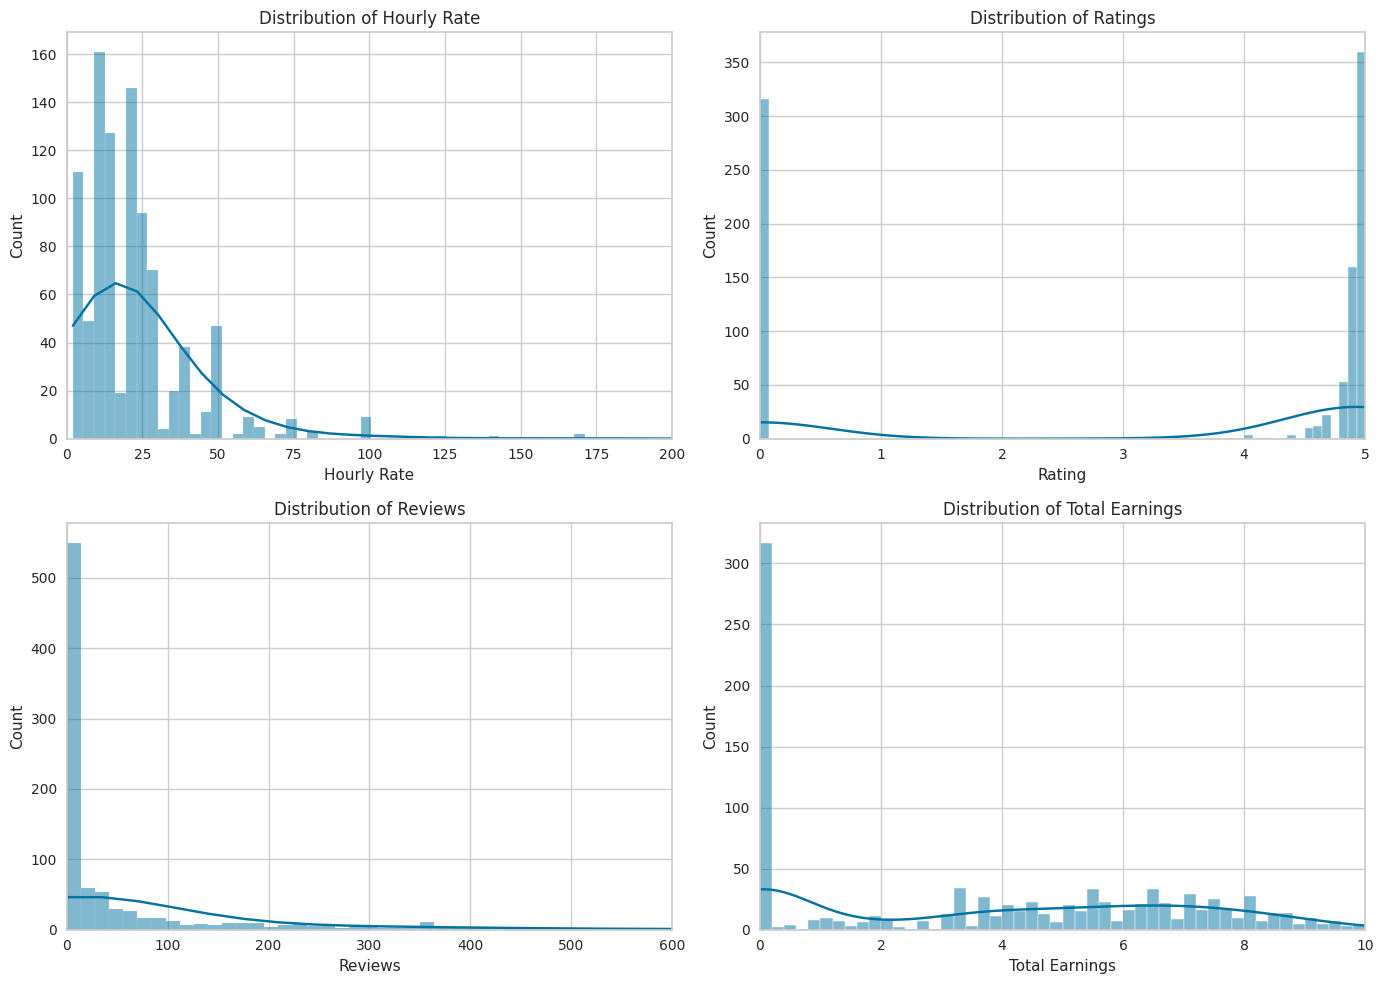

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

columns = ['Hourly Rate', 'Rating', 'Reviews', 'Total Earnings']
titles = ['Distribution of Hourly Rate', 'Distribution of Ratings', 'Distribution of Reviews', 'Distribution of Total Earnings']

# x-axis limits
x_limits = {
    'Hourly Rate': (0, 200),
    'Rating': (0, 5),
    'Reviews': (0, 600),
    'Total Earnings': (0, 10)
}

# bin sizes
bin_sizes = {
    'Hourly Rate': 400,
    'Rating': 70,
    'Reviews': 500,
    'Total Earnings': 50
}

for i, ax in enumerate(axes.flatten()):
    sns.histplot(df[columns[i]], bins=bin_sizes[columns[i]], kde=True, ax=ax)
    ax.set_title(titles[i])
    ax.set_xlabel(columns[i])
    ax.set_xlim(x_limits[columns[i]])

plt.tight_layout()
plt.show()


We can observe that:

- Hourly Rate:
The distribution is **right-skewed**, indicating that most freelancers charge between 0 and 75 dollars per hour, while a few freelancers have significantly higher rates. There are some extreme outliers above 100, suggesting premium services or specialized skills.

- Rating:
The distribution of ratings is **bimodal**, with peaks at 0 and 5. This suggests that a significant portion of freelancers either have no reviews or a perfect rating. Very few freelancers have ratings in the mid-range (between 1 and 4), indicating that clients tend to either rate freelancers highly or not at all. This pattern highlights the polarized nature of client feedback in the freelancing market.

- Reviews:
The distribution of reviews is highly **right-skewed**, indicating that most freelancers receive very few reviews or no review at all, with the majority having fewer than 10 reviews. A small number of freelancers, however, stand out with hundreds of reviews, suggesting they are highly active or have established a strong reputation in the market. This highlights a significant disparity in review distribution among freelancers.


- Total Earnings:
The distribution of total earnings is **right-skewed**, with many freelancers earning equals to 0 and only a small number reaching the maximum cap of 10. This pattern suggests that only a small number of customers complete payments for projects or contests on Freelancer.com. This indicates that while many freelancers participate, only a fraction successfully complete and get paid for their work.

**- Boxplots for Outlier Detection**


Boxplots help visualize outliers and the overall spread of the data. Since extreme values were noticed in Hourly Rate and Total Earnings, boxplots will confirm the extent of these outliers.

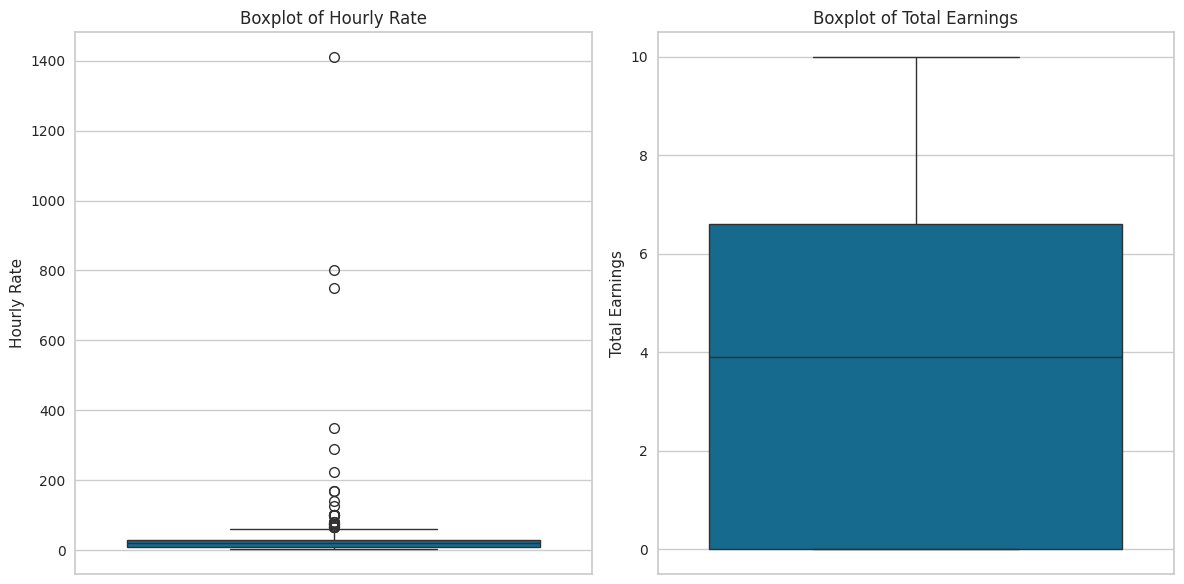

In [85]:
# Create boxplots for Hourly Rate and Total Earnings
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.boxplot(y=df["Hourly Rate"], ax=axes[0])
axes[0].set_title("Boxplot of Hourly Rate")

sns.boxplot(y=df["Total Earnings"], ax=axes[1])
axes[1].set_title("Boxplot of Total Earnings")

plt.tight_layout()
plt.show()


We can observe that:

Hourly Rate: There are many outliers above 100 dollars/hour, with some freelancers charging over 800 dollars/hour and even 1400 dollars/hour.

Total Earnings: The boxplot does not show extreme outliers due to the 10 dollars cap, but a small percentage of freelancers earn significantly more than the majority.
These insights suggest that income disparity is high in the freelance market, with a few top freelancers capturing most of the revenue.

**- Density Plots for Data Spread**

Density plots (KDE plots) provide a smooth representation of data distribution, highlighting concentration areas. Since Reviews and Total Earnings were highly skewed, we applied a logarithmic transformation to normalize their distribution. Log transformation compresses extreme values while preserving the overall structure, making patterns easier to interpret.

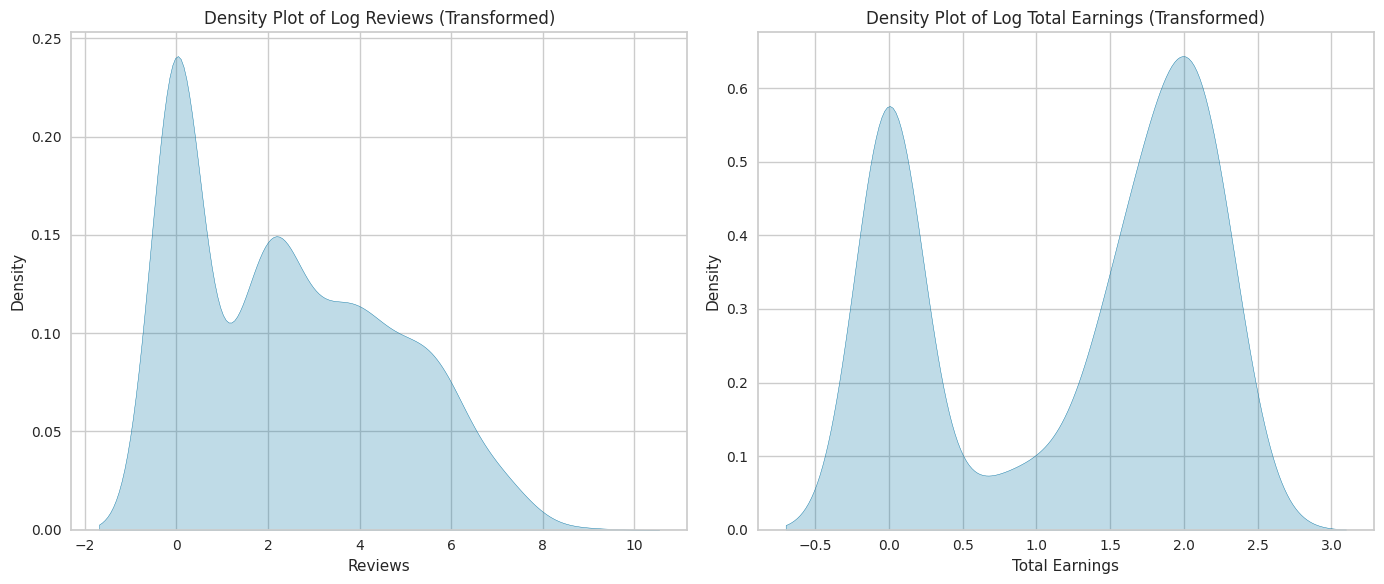

In [86]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Density plot for Log Reviews
sns.kdeplot(np.log1p(df['Reviews']), fill=True, ax=axes[0])
axes[0].set_title("Density Plot of Log Reviews (Transformed)")

# Density plot for Log Total Earnings
sns.kdeplot(np.log1p(df['Total Earnings']), fill=True, ax=axes[1])
axes[1].set_title("Density Plot of Log Total Earnings (Transformed)")

plt.tight_layout()
plt.show()


We can observe that:

- Log Reviews (Transformed):
The log-transformed reviews distribution still shows a skew, but it is now more interpretable. The presence of multiple peaks suggests that some freelancers receive very few reviews, while others accumulate significantly more.

- Log Total Earnings (Transformed):
The total earnings distribution is **bimodal**, with two peaks. One peak at lower values suggests that many freelancers earn minimal amounts, while the second peak suggests a separate group of higher-earning freelancers.

##### **- Choropleth Map: Distribution of Freelancers by Country**


The choropleth map visually represents the number of freelancers in each country. Darker shades indicate a higher number of freelancers, while lighter shades represent fewer freelancers.

In [87]:
import plotly.express as px

# Count freelancers per country
country_counts = df["Location"].value_counts().reset_index()
country_counts.columns = ["Country", "Freelancer Count"]

# Create choropleth map
fig = px.choropleth(country_counts,
                    locations="Country",
                    locationmode="country names",
                    color="Freelancer Count",
                    title="Distribution of Freelancers by Country",
                    color_continuous_scale="Blues")

# Align the title in the middle and make it bold
fig.update_layout(
    title_x=0.5,  # Center the title
)

# Show the figure
fig.show()

We can observe that:

freelancers are distributed across many countries, with the highest concentration in India (309 freelancers) and Pakistan (160 freelancers). Following these, Indonesia has 29 freelancers, and the USA has 23 freelancers.

##### **- Bar chart:**
 Bar chart is a graphical representation used to analyze the distribution of a single categorical variable. It displays distinct categories on the x-axis and their corresponding frequencies (counts or proportions) on the y-axis. This helps in identifying the most common and least common categories within the dataset.*italicized text*

###### (a) Top 10 most in-demand skills:


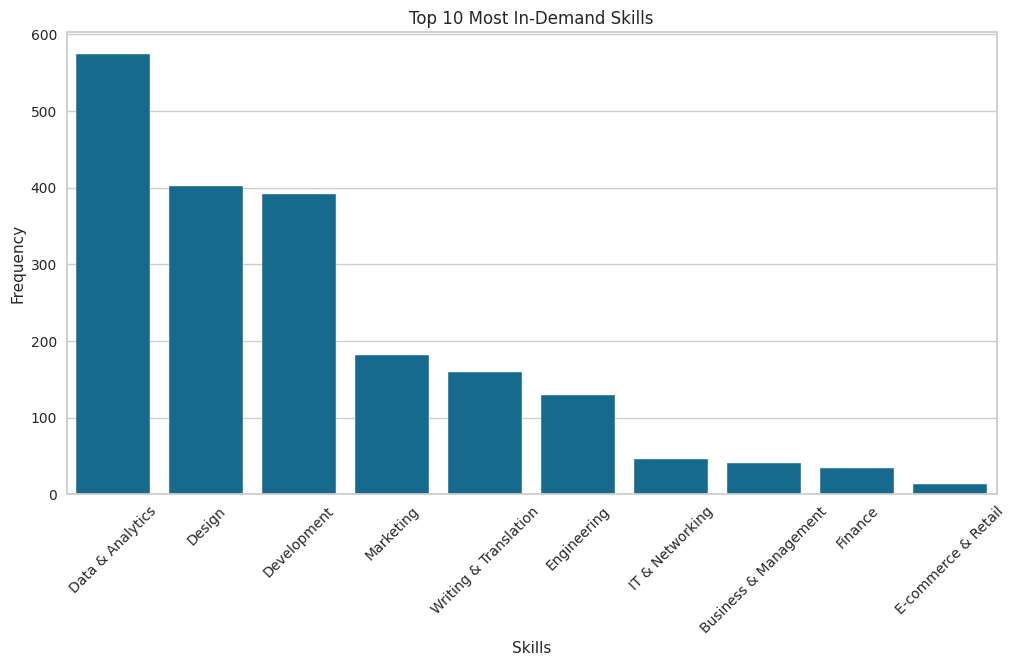

In [88]:
skill_counts = df["Skills"].str.split(", ").explode().value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=skill_counts.index[:10], y=skill_counts.values[:10])
plt.xticks(rotation=45)
plt.xlabel("Skills")
plt.ylabel("Frequency")
plt.title("Top 10 Most In-Demand Skills")
plt.show()

We can observe that:

The chart shows that Data & Analytics and Design dominate the freelancing market, reflecting high demand for data-driven and creative skills for freelancers. Development and Marketing are also in demand, highlighting the need for technical and promotional expertise. Skills in Writing & Translation, Engineering, Business & Management, Finance, Economics, and Retail further demonstrate the diverse opportunities and dynamic nature of the freelancing market.

##### **- Boxplot:**
Boxplot is a graphical representation of the distribution of a single numerical variable. It displays the median, quartiles, and potential outliers, helping to identify skewness, spread, and anomalies in the data. The box represents the interquartile range (IQR), while whiskers extend to 1.5 times the IQR. Points outside this range are considered outliers.


###### (a) Average earning for single/muli-skilled freelancers

Average Earnings for Single Skill Freelancers: $4.19
Average Earnings for Multiple Skills Freelancers: $3.52
Freelancers with a single skill earn more on average.


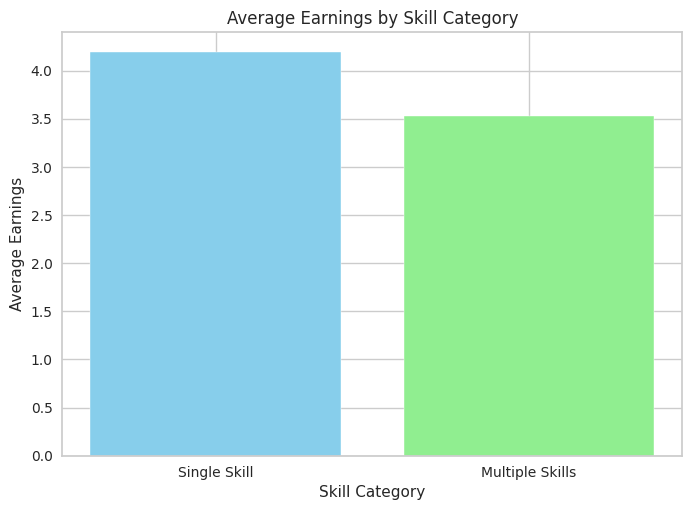

In [89]:
import pandas as pd

df = pd.read_csv("processed_bio.csv")

# Initialize variables to store total earnings and counts
single_skill_total = 0
single_skill_count = 0
multiple_skills_total = 0
multiple_skills_count = 0

# Iterate through the dataset
for index, row in df.iterrows():
    skills = row['Skills'].split(',')  # Split skills by comma
    earnings = row['Total Earnings']

    if len(skills) == 1:  # Single skill
        single_skill_total += earnings
        single_skill_count += 1
    else:  # Multiple skills
        multiple_skills_total += earnings
        multiple_skills_count += 1

# Calculate average earnings
single_skill_avg = single_skill_total / single_skill_count if single_skill_count > 0 else 0
multiple_skills_avg = multiple_skills_total / multiple_skills_count if multiple_skills_count > 0 else 0

# Output results
print(f"Average Earnings for Single Skill Freelancers: ${single_skill_avg:.2f}")
print(f"Average Earnings for Multiple Skills Freelancers: ${multiple_skills_avg:.2f}")

# Compare earnings
if single_skill_avg > multiple_skills_avg:
    print("Freelancers with a single skill earn more on average.")
elif single_skill_avg < multiple_skills_avg:
    print("Freelancers with multiple skills earn more on average.")
else:
    print("Both groups earn the same on average.")


# Data for visualization
categories = ['Single Skill', 'Multiple Skills']
averages = [single_skill_avg, multiple_skills_avg]

# Plot the results
plt.bar(categories, averages, color=['skyblue', 'lightgreen'])
plt.title('Average Earnings by Skill Category')
plt.xlabel('Skill Category')
plt.ylabel('Average Earnings')
plt.show()

We can observe that:

Freelancers with a single skill earn slightly more than those with multiple skills which having average earning 3.5. This could be because specializing in one skill leads to higher expertise and demand, while multi-skilled freelancers might spread their focus too thin. Certain specialized skills may also pay more. More research is needed to fully understand the reasons behind this trend.



##### **- Word cloud:**
A word cloud is a visualization technique that displays the most frequent words in a dataset, where the size of each word corresponds to its frequency. It is especially useful for analyzing categorical or textual data by highlighting commonly occurring terms.

###### (a) Most common freelance skills

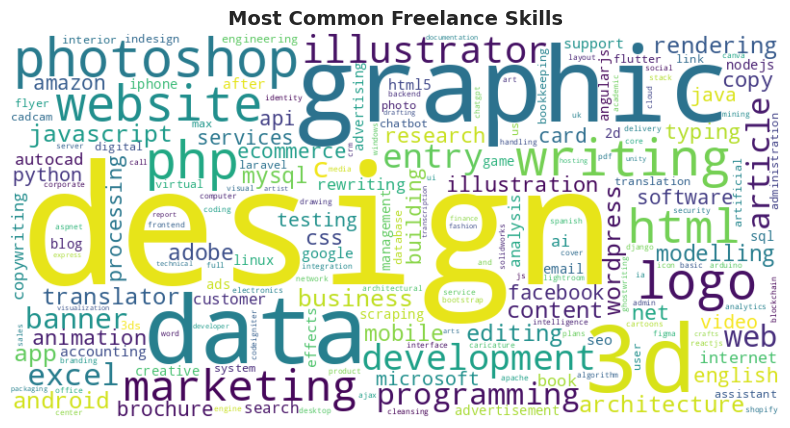

Skill Frequencies:
Counter({'design': 905, 'graphic': 247, 'data': 200, '3d': 194, 'photoshop': 180, 'php': 176, 'writing': 171, 'logo': 166, 'website': 157, 'html': 146, 'marketing': 123, 'illustrator': 122, 'development': 119, 'entry': 103, 'article': 92, 'excel': 88, 'programming': 87, 'web': 80, 'c': 77, 'banner': 76, 'javascript': 74, 'wordpress': 72, 'app': 70, 'business': 68, 'architecture': 61, 'translator': 60, 'android': 59, 'rendering': 58, 'content': 57, 'editing': 55, 'modelling': 54, 'adobe': 54, 'mobile': 54, 'mysql': 53, 'css': 50, 'illustration': 49, 'processing': 48, 'animation': 47, 'net': 45, 'copy': 44, 'typing': 43, 'research': 42, 'english': 40, 'services': 40, 'building': 39, 'card': 39, 'amazon': 39, 'software': 39, 'brochure': 38, 'api': 37, 'facebook': 37, 'ecommerce': 36, 'video': 34, 'testing': 33, 'microsoft': 33, 'python': 32, 'java': 32, 'rewriting': 31, 'copywriting': 31, 'autocad': 31, 'ai': 30, 'book': 30, 'internet': 30, 'search': 28, 'customer': 27,

In [90]:
# Install necessary libraries
!pip install wordcloud matplotlib pandas

# Import required libraries
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
from collections import Counter

# Create a DataFrame
data = pd.read_csv("https://raw.githubusercontent.com/iRoseM/Freelancing-Trends--IT362/main/Dataset/Raw_Dataset.csv")
df = pd.DataFrame(data)

# Normalize the text: convert to lowercase and remove punctuation
def normalize_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    return text

# Handle NaN values and apply normalization to the "Skills" column
df["Skills"] = df["Skills"].fillna('')  # Replace NaN with empty string
df["Skills"] = df["Skills"].apply(normalize_text)

# Split skills into individual words and count their frequency
all_skills = " ".join(df["Skills"]).split()  # No need for dropna() since we filled NaNs
skill_frequencies = Counter(all_skills)

# Convert to a dictionary for WordCloud
skill_frequencies_dict = dict(skill_frequencies)

# Generate word cloud with normalized text
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color="white",
    colormap="viridis",
    max_words=200,
).generate_from_frequencies(skill_frequencies_dict)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Freelance Skills", fontsize=14, fontweight="bold")
plt.show()

# Print the skill frequencies for verification
print("Skill Frequencies:")
print(skill_frequencies)

We can observe that:

The word cloud shows "design" popping up most often (905 times), followed by "graphic" (247) and "data" (200), but these terms are pretty broad—"design" could mean anything from logos to databases, and "graphic" might cover animations or illustrations. That’s why, even though "data" ranks third here, column charts (which group skills like data analysis or machine learning under " Data & Analytics") make it look like the top field. Word clouds are great for spotting hot keywords, but they miss the nuance—like how " Data & Analytics" isn’t just one word. Pairing both methods helps balance the big trends with the specifics.



**- Choropleth Map: Distribution of Freelancers by Country**

#### **4- Graphical multivariate**
These plots analyze relationships between two or more variables.

##### **- Boxplot: Hourly Rate per Country**


The boxplot displays the distribution of freelancers' hourly rates across different countries. It shows the median, quartiles, and potential outliers for each country's rates.

<ipython-input-91-34be44054106>:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




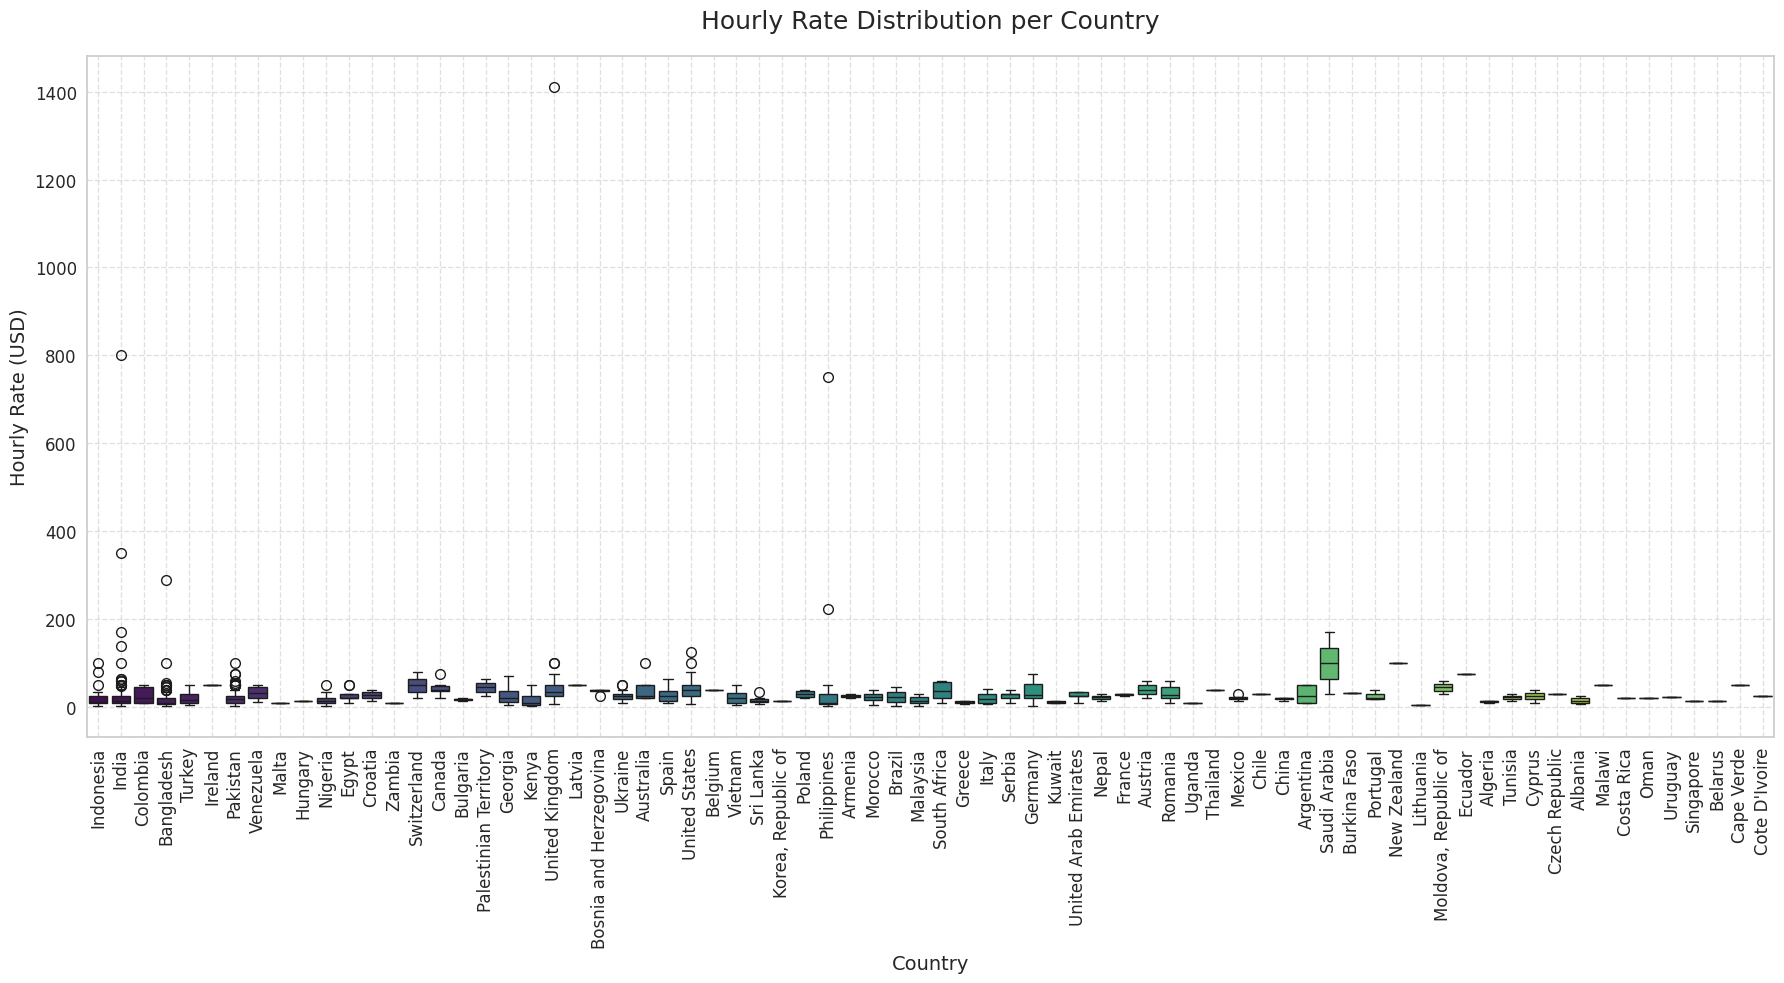

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("processed_bio.csv")

# Set figure size
plt.figure(figsize=(18, 10))  # Increase width and height for better visibility

# Create boxplot with a color palette
sns.boxplot(x="Location", y="Hourly Rate", data=df, palette="viridis")

# Improve text visibility
plt.xticks(rotation=90, fontsize=12)  # Rotate x-axis labels
plt.yticks(fontsize=12)  # Increase font size of y-axis labels

# Add gridlines for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Add labels and title with improved formatting
plt.xlabel("Country", fontsize=14)
plt.ylabel("Hourly Rate (USD)", fontsize=14)
plt.title("Hourly Rate Distribution per Country", fontsize=18, pad=20)

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

We can observe that:

The distribution of freelancers' hourly rates varies significantly across countries, with notable outliers exceeding $1400 per hour in the UK. Countries like the United States, United Kingdom, and Switzerland tend to have higher median rates, while South Asian and African countries generally offer lower rates due to market competition. However, these figures vary depending on the number of data points and their distribution. Overall, the data highlights global disparities in freelancer earnings, with specialized skills commanding premium rates in certain regions.

##### **- Boxplot: Total Earnings per Country**


This boxplot visualizes the distribution of total earnings for freelancers in different countries. It provides insights into which countries have higher-earning freelancers and identifies outliers.

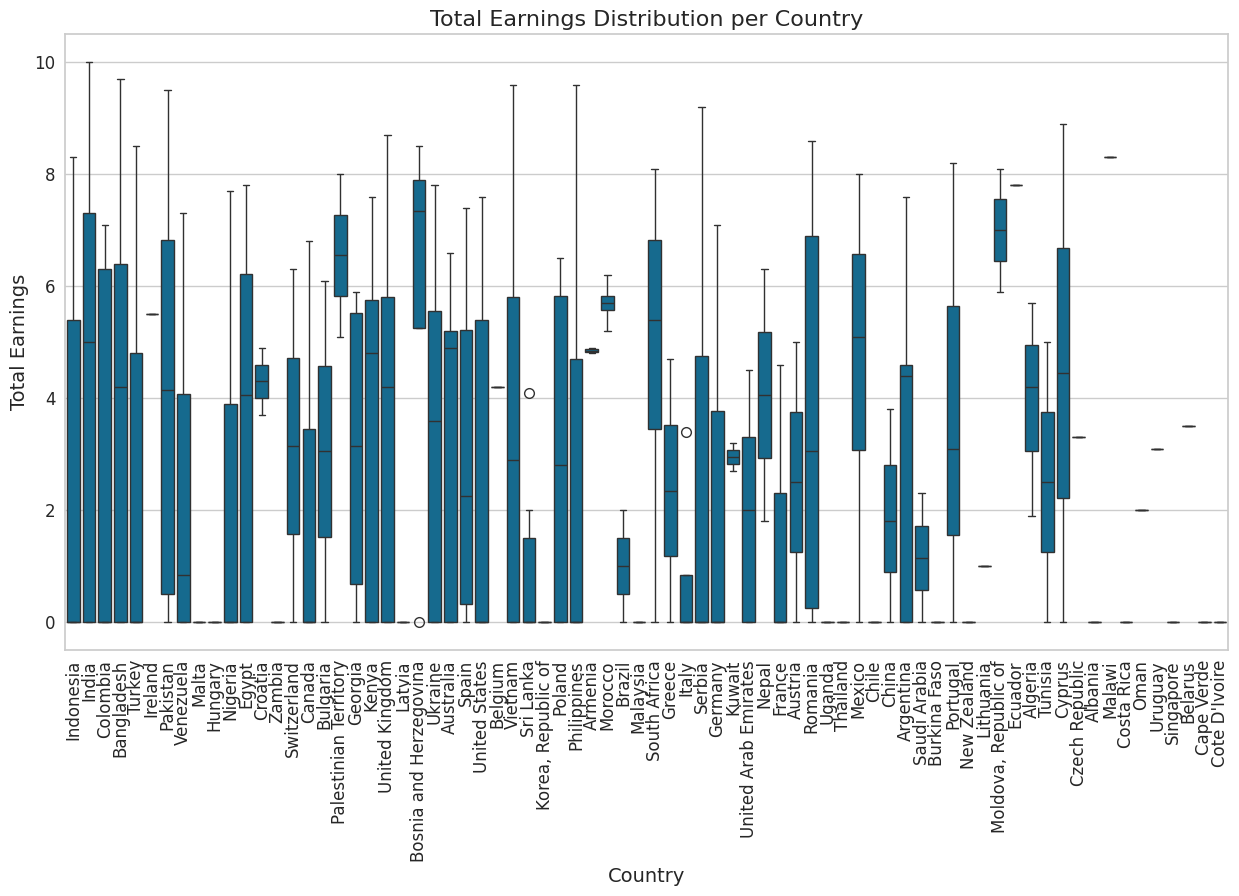

In [92]:
# the figure size
plt.figure(figsize=(15, 8))  # Increase width and height

# Create boxplot
sns.boxplot(x="Location", y="Total Earnings", data=df)

# Improve text visibility
plt.xticks(rotation=90, fontsize=12)  # Rotate x-axis labels
plt.yticks(fontsize=12)  # Increase font size of y-axis labels
plt.xlabel("Country", fontsize=14)
plt.ylabel("Total Earnings", fontsize=14)
plt.title("Total Earnings Distribution per Country", fontsize=16)

plt.show()

We can observe that:

The distribution of freelancer earnings varies significantly across countries, with notable disparities influenced by market demand and skill specialization. Countries like the United States, United Kingdom, and Switzerland exhibit higher median earnings, while others show lower and more varied income levels. The presence of outliers suggests that a small group of high-earning freelancers significantly impacts overall distribution. These individuals likely possess specialized skills or cater to high-paying international clients. Overall, economic conditions, competition, and expertise play key roles in shaping freelancer earnings globally.

##### **- Scatter Plots For Trends:**
Scatter plots are used to visually explore trends and relationships between different variables. By plotting Rating vs. Total Earnings, Reviews vs. Hourly Rate, and Skills Count vs. Total Earnings, we can observe potential patterns, outliers, or dependencies that might not be immediately evident from raw data. These visualizations help in identifying meaningful insights for further analysis.

###### (a) Rating vs. Total Earnings

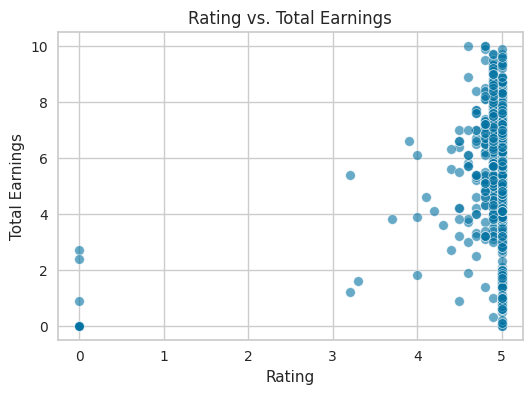

In [93]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x="Rating", y="Total Earnings", alpha=0.6)
plt.title("Rating vs. Total Earnings")
plt.xlabel("Rating")
plt.ylabel("Total Earnings")
plt.show()

We can observe that:
  * The majority of the ratings are clustered around 5, with a few instances of lower ratings.
  * Higher total earnings seem to be associated with ratings close to 5, while lower ratings correspond to lower earnings.
  * There are a few outliers at very low ratings, but they do not seem to have high total earnings.

###### (b) Reviews vs. Hourly Rate


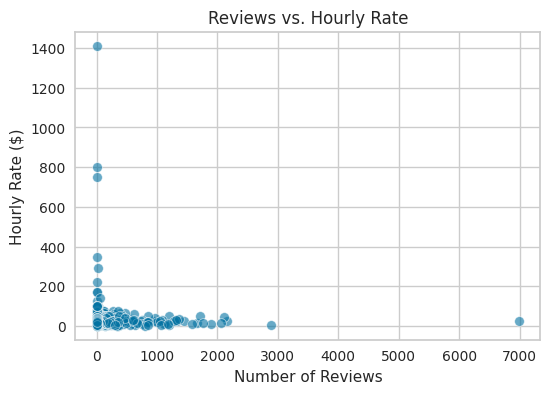

In [94]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x="Reviews", y="Hourly Rate", alpha=0.6)
plt.title("Reviews vs. Hourly Rate")
plt.xlabel("Number of Reviews")
plt.ylabel("Hourly Rate ($)")
plt.show()

We can observe that:
  * Most of the data points are concentrated at lower hourly rates.
  * There are a few extreme outliers where the hourly rate is significantly high.
  * A higher number of reviews does not necessarily correlate with higher hourly rates.

###### (c) Skills Count vs. Total Earnings

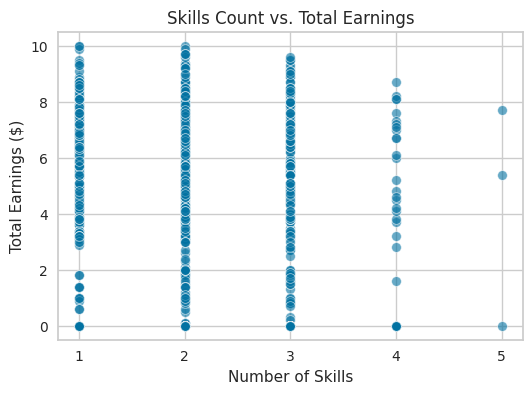

In [95]:
df['Skills Count'] = df['Skills'].apply(lambda x: len(str(x).split(',')))

plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x=pd.Categorical(df['Skills Count'], ordered=True), y="Total Earnings", alpha=0.6)

plt.xticks(sorted(df['Skills Count'].unique()))  # Ensuring the x-axis is sorted numerically
plt.title("Skills Count vs. Total Earnings")
plt.xlabel("Number of Skills")
plt.ylabel("Total Earnings ($)")
plt.show()

We can observe that:
  * For each specific skill count, total earnings vary widely. This indicates that the number of skills alone does not solely determine earnings—other factors like skill relevance, experience, or market demand may also play a role.
  * Higher skill counts show a slight trend toward increased earnings, but not strictly linear.  
  * High earners exist across all skill levels, suggesting skill value matters more than quantity.

####**5. Outlier Handling**

<!-- Outliers are extreme values that can significantly impact data analysis and model performance. In this step, we identify and handle outliers in the dataset using the Interquartile Range (IQR) method with custom multipliers. Instead of removing all outliers, we apply capping (Winsorization) to ensure that extreme values do not distort our analysis while keeping most data points. However, we make an exception for one extreme outlier—a freelancer with an hourly rate of $1411, which is unrealistic and could distort our findings. -->

**Detecting Outliers Using Custom IQR Multipliers**

The Interquartile Range (IQR) method is used to detect outliers by computing the 25th percentile (Q1) and 75th percentile (Q3). Traditionally, outliers are defined as values beyond 1.5 × IQR, but in our case, we adjust the thresholds for each column based on its natural variation.

Custom IQR Multipliers per Column

| Column          | IQR Multiplier | Reasoning |
|----------------|--------------|-----------|
| **Hourly Rate**   | 2.0 × IQR   | Allows slightly higher hourly rates as variation is expected. |
| **Rating**        | 1.5 × IQR   | Ratings are between **0-5**, so a stricter limit is used. |
| **Reviews**       | 3.0 × IQR   | Some freelancers naturally receive many reviews, so we allow more variation. |
| **Total Earnings**| 2.5 × IQR   | High earnings are expected but should be controlled. |

In [96]:
numeric_cols = ['Hourly Rate', 'Rating', 'Reviews', 'Total Earnings']

# Compute Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Define custom multipliers for each column
iqr_multipliers = {
    "Hourly Rate": 2.0,
    "Rating": 1.5,
    "Reviews": 3.0,
    "Total Earnings": 2.5
}

lower_bounds = {}
upper_bounds = {}

for col in numeric_cols:
    lower_bounds[col] = Q1[col] - iqr_multipliers[col] * IQR[col]
    upper_bounds[col] = Q3[col] + iqr_multipliers[col] * IQR[col]

print("\n Number of outliers detected per column (with custom thresholds):")

outlier_dict = {}

for col in numeric_cols:
    outliers_col = df[(df[col] < lower_bounds[col]) | (df[col] > upper_bounds[col])]
    num_outliers = outliers_col.shape[0]
    print(f"   ➜ {col}: {num_outliers} outliers")

    if num_outliers > 0:
        outlier_dict[col] = outliers_col

for col, outliers_data in outlier_dict.items():
    print(f"\n Detected Outliers for: {col} (showing first 10 rows)")
    display(outliers_data.head(10))


 Number of outliers detected per column (with custom thresholds):
   ➜ Hourly Rate: 30 outliers
   ➜ Rating: 0 outliers
   ➜ Reviews: 105 outliers
   ➜ Total Earnings: 0 outliers

 Detected Outliers for: Hourly Rate (showing first 10 rows)


,Freelancer Name,Hourly Rate,Skills,Location,Rating,Reviews,Total Earnings,Bio,Skills Count
19,niveditajha1,100,"Data & Analytics, Development",India,0.0,0.0,0.0,time stuff computer ai iot mathematics cofoun...,2
27,timoboehme,80,"Data & Analytics, Design, Development",Switzerland,5.0,17.0,6.3,cordova owe c till developer ionic hired gui ...,3
29,CheekyCreative,75,"Data & Analytics, Design, Marketing",Canada,0.0,0.0,0.0,cheeky several come influence canada find tim...,3
104,wcorp,125,"Business & Management, Development, Engineering",United States,5.0,3.0,5.1,responsibility sql hockey openoffice daytoday...,3
281,Adriansyahrial,80,"Marketing, Design, Data & Analytics, Engineering",Indonesia,0.0,0.0,0.0,design manufacturing improvement knowing indu...,4
283,codingcow,100,Development,United Kingdom,5.0,16.0,7.0,considering debugging scraping background sec...,1
290,Klaus,75,"Data & Analytics, Development",Germany,5.0,59.0,7.1,ninjatrader successfull also project trading ...,2
318,Pateltwinkal2102,1411,Data & Analytics,United Kingdom,0.0,0.0,0.0,responsibility providing information smooth a...,1
342,CiaranFar,100,"Data & Analytics, Design, Engineering",New Zealand,0.0,0.0,0.0,st billion stair john connect coordinating co...,3
348,rajneeshb,350,"Data & Analytics, Writing & Translation",India,0.0,0.0,0.0,innovative sql close developing negotiation p...,2



 Detected Outliers for: Reviews (showing first 10 rows)


,Freelancer Name,Hourly Rate,Skills,Location,Rating,Reviews,Total Earnings,Bio,Skills Count
9,QualityHub,20,"Data & Analytics, Writing & Translation",Pakistan,4.9,459.0,6.8,slide time methodology deadline essay turniti...,2
20,durgapukamalakar,60,"Data & Analytics, Design",India,5.0,295.0,7.6,operate client durgapu toptier formatting big...,2
51,arijit81,15,"Data & Analytics, Design, Development",India,4.9,1128.0,9.2,effective showcasing scratch uxui click inclu...,3
53,usuf001,25,"Data & Analytics, Development",India,5.0,945.0,7.9,contribution resolving field specializing sec...,2
54,Iwori,45,"Data & Analytics, Development",Venezuela,5.0,358.0,7.3,hi product prevalent excited know field thing...,2
59,sweta2317,30,"Data & Analytics, Design, Development",India,4.9,1325.0,9.3,showing reduced sweta creation outlook produc...,3
122,faizythebest,50,"Data & Analytics, Engineering, Development",Pakistan,5.0,1191.0,8.9,product tool world freelance woocommerce spec...,3
125,dfordesigners,25,"Design, Development",Pakistan,4.9,361.0,8.6,hi warm secure deadline available woocommerce...,2
139,rsinfotechindia,24,Design,India,4.8,361.0,7.2,define delivery plugin time capable g one att...,1
183,jbosseu,35,"IT & Networking, Development",India,5.0,583.0,7.4,part single however scale java developer adva...,2


Observations:

Outliers are extreme values that can significantly impact data analysis and model performance. In this step, we identify and handle outliers in the dataset using the Interquartile Range (IQR) method with custom multipliers. For one extreme outlier a freelancer with an hourly rate of $1411, we decided to remove it because it is unrealistic and could distort our findings. However, for reviews and hourly rate we left it becase we consederd it in the normal range but we would smooth it when structuring the data models by capping the values.

<!--
 Instead of removing all outliers, we apply capping (Winsorization) to ensure that extreme values do not distort our analysis while keeping most data points. However, we make an exception for one extreme outlier—a freelancer with an hourly rate of $1411, which is unrealistic and could distort our findings. This record is removed before processing. -->

**Handling Outliers:** Removing the Extreme Outlier

<!-- **Handling Outliers: Removing the Extreme Outlier and Capping the Rest** -->
To handle the detected outliers, we remove the extreme freelancer with a rate of $1411 before applying capping (Winsorization). Capping replaces extreme values with predefined limits instead of removing them, ensuring:
<!--
All reasonable data points are preserved (except for the extreme case).
Extreme values do not skew analysis but remain within controlled ranges.
Dataset maintains statistical consistency while reducing distortions. -->

In [97]:
# Remove the freelancer with an extreme Hourly Rate of 1411
df = df.loc[df['Hourly Rate'] != 1411].copy()

# Save the modified dataset
df.to_csv("Processed_Dataset.csv", index=False)

print("\n Sample rows after capping outliers:")
display(df.head(10))



 Sample rows after capping outliers:


,Freelancer Name,Hourly Rate,Skills,Location,Rating,Reviews,Total Earnings,Bio,Skills Count
0,artdjuna,30,"Data & Analytics, Design",Indonesia,4.9,171.0,8.3,client satisfied trying since make best exper...,2
1,kkwebart09,15,Design,India,4.9,17.0,6.4,time available depend development unlimited f...,1
2,enervell,50,Development,Colombia,5.0,27.0,6.3,sql focus forefront secure ec enabling field ...,1
3,sharminnaharm,10,Design,Bangladesh,4.9,138.0,6.8,focus browse time tool happy clean opportunit...,1
4,ancineha,15,"Data & Analytics, Design, Engineering, Marketi...",India,5.0,71.0,7.7,joomla try sentiment click commercial jquery ...,5
5,Kubragull,50,"Data & Analytics, Design, Engineering",Turkey,4.5,55.0,6.4,drawing plan service commercial sectional tha...,3
6,mdsadikulislamss,10,Design,Bangladesh,5.0,15.0,5.5,logo top online card banner expert one create...,1
7,trivediheenalove,20,"Data & Analytics, Marketing, Development",India,5.0,4.0,5.5,sql xx sem ad bb testing jquery development z...,3
8,RMMcontractors,50,"Data & Analytics, Development",Ireland,5.0,7.0,5.5,hi innovative lie fullstack advanced time ai ...,2
9,QualityHub,20,"Data & Analytics, Writing & Translation",Pakistan,4.9,459.0,6.8,slide time methodology deadline essay turniti...,2


Observations:

- The freelancer charging $1411 per hour has been removed to prevent distortion in analysis.
- Capping (Winsorization) has been applied after removal, ensuring that remaining outliers are controlled within reasonable limits.
- Hourly Rate outliers have been adjusted, keeping most freelancers within a practical price range.
- Review counts are now more balanced, preventing a few highly-rated freelancers from overshadowing others.
- The dataset remains balanced and representative, avoiding extreme fluctuations caused by unrealistic pricing.

### **6.Modelling**

### - Classification Models:

### **1. Baseline Model**

Before testing any hypothesis, it's crucial to establish a baseline model to understand the general patterns in the data.

**Steps:**

1- Splitting the data into training and testing sets.

2- Training a simple baseline model, such as Linear Regression .

3- Evaluating the model using  or RMSE/R² .

In [98]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Selecting relevant features
df['Skill Count'] = df['Skills'].apply(lambda x: len(x.split(',')) if isinstance(x, str) else 0)
features = ['Rating', 'Reviews', 'Hourly Rate', 'Skill Count']
X = df[features]
y = df['Total Earnings']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training a baseline regression model
baseline_model = LinearRegression()
baseline_model.fit(X_train, y_train)

# Making predictions
y_pred = baseline_model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f"Baseline Model RMSE: {rmse:.2f}")
print(f"Baseline Model R² Score: {r2:.2f}")


Baseline Model RMSE: 2.12
Baseline Model R² Score: 0.55




#### **Interpretation:**
- **RMSE of 2.12** suggests that while the model makes predictions, there is still room for improvement in terms of accuracy.
- **R² of 0.55** shows that the model is only partially capturing the relationship between the features and the target. This indicates that the model's predictive power is moderate, and further enhancements are necessary to improve its performance.



### **Hypothesis 1:** Reputation and Reviews Drive Client Acquisition

In [99]:
from scipy.stats import pearsonr
import statsmodels.api as sm

# Correlation Analysis
corr_rating, p_rating = pearsonr(df['Rating'], df['Total Earnings'])
corr_reviews, p_reviews = pearsonr(df['Reviews'], df['Total Earnings'])

print(f"Correlation between Rating and Earnings: {corr_rating:.2f}, p-value: {p_rating:.4f}")
print(f"Correlation between Reviews and Earnings: {corr_reviews:.2f}, p-value: {p_reviews:.4f}")

# Multiple Regression
X = df[['Rating', 'Reviews']]
X = sm.add_constant(X)
y = df['Total Earnings']

model = sm.OLS(y, X).fit()
print(model.summary())


Correlation between Rating and Earnings: 0.82, p-value: 0.0000
Correlation between Reviews and Earnings: 0.44, p-value: 0.0000
                            OLS Regression Results                            
Dep. Variable:         Total Earnings   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     1328.
Date:                Tue, 18 Mar 2025   Prob (F-statistic):          5.37e-275
Time:                        21:45:38   Log-Likelihood:                -1807.3
No. Observations:                 946   AIC:                             3621.
Df Residuals:                     943   BIC:                             3635.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----



#### **Correlation Results:**
1. **Correlation between Rating and Earnings: 0.82, p-value: 0.0000**
   - **Interpretation**: There is a **strong positive correlation** (0.82) between the freelancer's **rating** and their **earnings**. This means that as the rating increases, earnings tend to increase as well. The **p-value of 0.0000** suggests that this correlation is statistically significant, meaning that it's highly unlikely that this relationship occurred by chance.
   
2. **Correlation between Reviews and Earnings: 0.44, p-value: 0.0000**
   - **Interpretation**: There is a **moderate positive correlation** (0.44) between the **number of reviews** and **earnings**. This indicates that freelancers with more reviews tend to have higher earnings, but the relationship is not as strong as that between ratings and earnings. Again, the **p-value of 0.0000** indicates that this correlation is statistically significant.

---

#### **OLS Regression Results:**
This part represents the results of an **Ordinary Least Squares (OLS)** regression, which models the relationship between independent variables (Rating and Reviews) and the dependent variable (Total Earnings).

1. **R-squared: 0.738**
   - **Interpretation**: This means that approximately **73.8%** of the variance in **Total Earnings** can be explained by the model using the variables **Rating** and **Reviews**. This is a good sign that these features have significant predictive power in explaining earnings.

2. **Adj. R-squared: 0.737**
   - **Interpretation**: This value is almost the same as R-squared, suggesting that the model fits the data well even after adjusting for the number of predictors. The adjusted R-squared accounts for the possibility of overfitting when adding more variables.

3. **F-statistic: 1328**
   - **Interpretation**: The **F-statistic** tests whether at least one of the predictors (Rating, Reviews) is significantly related to the dependent variable (Total Earnings). The high value of **1328** along with the **p-value** of **5.37e-275** shows that the model as a whole is highly statistically significant.

---

#### **Model Coefficients:**
These values represent the relationship between each independent variable and the dependent variable.

1. **Intercept (const): 0.0313**
   - This is the baseline value of **Total Earnings** when both **Rating** and **Reviews** are zero. In this case, it is very close to zero, indicating that freelancers with no ratings or reviews still have a small base earnings amount.

2. **Rating Coefficient: 1.0409**
   - **Interpretation**: For each additional point increase in the **Rating**, the **Total Earnings** increase by **1.0409 units**. This coefficient is statistically significant (p-value = 0.000), which means the effect of Rating on earnings is meaningful.

3. **Reviews Coefficient: 0.0025**
   - **Interpretation**: For each additional review, **Total Earnings** increase by **0.0025 units**. This suggests that while reviews have a positive effect on earnings, their impact is less pronounced than the effect of the rating.

---

### **Statistical Significance (P-values for each coefficient):**
- **Rating (p-value: 0.000)**: The p-value for Rating is less than 0.05, indicating that the Rating variable has a statistically significant impact on Total Earnings.
- **Reviews (p-value: 0.000)**: Similarly, the p-value for Reviews is also less than 0.05, suggesting that it is a statistically significant predictor of Total Earnings.

#### **Other Statistics:**
- **Omnibus Test**: The Omnibus test checks the normality of the residuals (errors). The high value of **234.688** and the low **p-value** indicate that the residuals are not perfectly normal. This could suggest that the model might not capture all the patterns in the data.
- **Durbin-Watson: 1.461**: This statistic tests for autocorrelation in the residuals. A value close to 2 suggests no autocorrelation. The value of **1.461** indicates mild positive autocorrelation.
- **Jarque-Bera Test**: The **Jarque-Bera (JB)** test assesses the normality of the residuals. The high value (**1049.802**) suggests that the residuals deviate significantly from normality.

---

#### **Conclusion:**
The regression model suggests that both **Rating** and **Reviews** are significant predictors of **Total Earnings**. The **R-squared** value of 0.738 shows that the model explains a good portion of the variability in earnings. The positive correlations and statistical significance of the coefficients for Rating and Reviews reinforce the idea that better ratings and more reviews contribute to higher earnings for freelancers.

### **Hypothesis 2:** Global Economic Conditions Influence Freelance Pricing

In [100]:
from sklearn.preprocessing import LabelEncoder
from scipy.stats import pearsonr
import statsmodels.api as sm

# Encode the 'Location' column into numerical values
label_encoder = LabelEncoder()
df['Location_encoded'] = label_encoder.fit_transform(df['Location'])

# Correlation Analysis
corr_gdp, p_gdp = pearsonr(df['Location_encoded'], df['Hourly Rate'])
print(f"Correlation between Location and Hourly Rate: {corr_gdp:.2f}, p-value: {p_gdp:.4f}")

# Multiple Regression
X = df[['Rating', 'Reviews']]
X = sm.add_constant(X)
y = df['Total Earnings']

model = sm.OLS(y, X).fit()
print(model.summary())


Correlation between Location and Hourly Rate: 0.08, p-value: 0.0168
                            OLS Regression Results                            
Dep. Variable:         Total Earnings   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     1328.
Date:                Tue, 18 Mar 2025   Prob (F-statistic):          5.37e-275
Time:                        21:45:38   Log-Likelihood:                -1807.3
No. Observations:                 946   AIC:                             3621.
Df Residuals:                     943   BIC:                             3635.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------


#### **Correlation Rseults** between Location and Hourly Rate:
- **Correlation**: 0.08
  - This indicates a very weak positive correlation between `Location` and `Hourly Rate`. In other words, there is a minimal relationship between these two variables.
  
- **p-value**: 0.0168
  - The p-value is less than 0.05, which indicates that the correlation is statistically significant. Although the correlation is weak, it is still unlikely to be due to random chance.

---

#### **OLS Regression Results:**

- **R-squared**: 0.738
  - This tells you that approximately 73.8% of the variation in `Total Earnings` can be explained by the independent variables (`Rating` and `Reviews`). This is a relatively good fit for a model.

- **Adjusted R-squared**: 0.737
  - Adjusted R-squared accounts for the number of predictors in the model. It is very close to R-squared, indicating that the model does not have excessive predictors and is likely a good fit.

- **F-statistic**: 1328
  - The F-statistic tests the overall significance of the model. A higher value indicates a strong model. The p-value for the F-statistic (`5.37e-275`) is extremely small, meaning that at least one of the predictors is significantly related to the outcome.

---

#### **Model Coefficients:**
  - **const (Intercept)**: 0.0313
    - This is the estimated value of `Total Earnings` when both `Rating` and `Reviews` are zero. It’s not very meaningful on its own.
  
  - **Rating**: 1.0409
    - For each 1-unit increase in `Rating`, the `Total Earnings` are expected to increase by 1.0409 units, assuming all other variables remain constant. This suggests that `Rating` has a positive relationship with `Total Earnings`.
  
  - **Reviews**: 0.0025
    - For each additional `Review`, `Total Earnings` are expected to increase by 0.0025 units. The effect is smaller compared to `Rating`, but still significant.

- **Standard Error**: The standard errors of the coefficients show the variability of the estimates.
  - For `Rating`, the standard error is 0.024, indicating that the coefficient is estimated with relatively high precision.
  - For `Reviews`, the standard error is 0.000, showing a very precise estimate of the effect.

- **t-value** and **P-value**:
  - The t-values for both `Rating` (44.209) and `Reviews` (16.058) are very high, indicating that both are highly significant predictors of `Total Earnings`.
  - The p-values for both are 0.000, indicating that both variables are statistically significant at any reasonable level (such as 0.05).

---
#### **Diagnostics:**
- **Omnibus** and **Prob(Omnibus)**: These values are used to test if the residuals (errors) of the model are normally distributed. A very high value for the Omnibus test (234.688) and a p-value of 0.000 suggest that the residuals are not normally distributed. This could indicate that the model might not capture all patterns in the data.
  
- **Durbin-Watson**: 1.461
  - This tests for autocorrelation in the residuals. Values close to 2 indicate no autocorrelation. Since this value is closer to 2, there is likely no strong autocorrelation in the residuals.
  
- **Jarque-Bera**: 1049.802
  - This test checks for the normality of the residuals. The p-value is very small, indicating that the residuals are not normally distributed.

- **Kurtosis**: 7.684
  - A high value for kurtosis suggests that the residuals have fat tails, which can indicate the presence of outliers in the data.
---
#### **Conclusion:**
- The model explains 73.8% of the variance in `Total Earnings`, with `Rating` being the most significant predictor.
- The residuals do not appear to be normally distributed, and there may be some outliers or skew in the data that the model does not account for.
- Overall, the model seems to be a good fit for the data, though there are indications of non-normality in the residuals.

### **Hypothesis 3:** Top Freelancers Dominate the Market

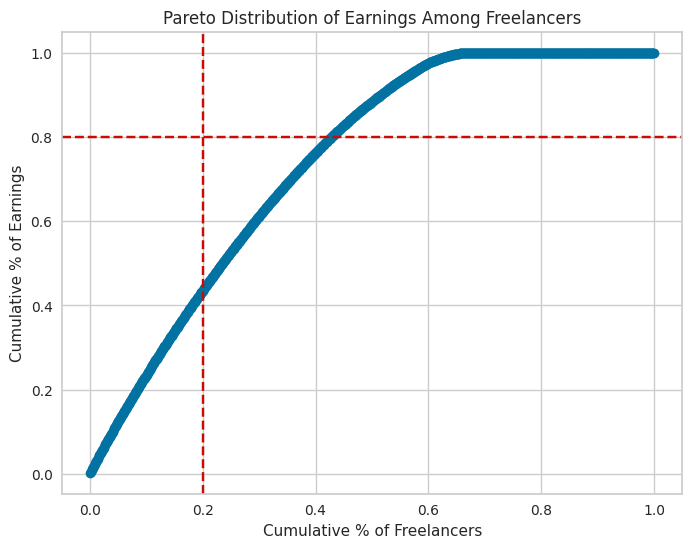

In [101]:

# Sort freelancers by earnings
df_sorted = df.sort_values(by='Total Earnings', ascending=False)
df_sorted['Cumulative Earnings'] = df_sorted['Total Earnings'].cumsum() / df_sorted['Total Earnings'].sum()
df_sorted['Cumulative Freelancers'] = np.arange(1, len(df_sorted)+1) / len(df_sorted)

# Pareto Plot
plt.figure(figsize=(8, 6))
plt.plot(df_sorted['Cumulative Freelancers'], df_sorted['Cumulative Earnings'], marker='o')
plt.axhline(y=0.8, color='r', linestyle='--')
plt.axvline(x=0.2, color='r', linestyle='--')
plt.xlabel("Cumulative % of Freelancers")
plt.ylabel("Cumulative % of Earnings")
plt.title("Pareto Distribution of Earnings Among Freelancers")
plt.show()


### **Hypothesis 4:** Specialization vs. Skill Diversification

In [102]:
# Count number of skills per freelancer
df['Skill Count'] = df['Skills'].apply(lambda x: len(str(x).split(',')))

# Correlation Analysis
corr_skills, p_skills = pearsonr(df['Skill Count'], df['Total Earnings'])
print(f"Correlation between Skill Count and Earnings: {corr_skills:.2f}, p-value: {p_skills:.4f}")

# ANOVA Test for Specialization vs. Generalization
df['Skill Category'] = df['Skill Count'].apply(lambda x: 'Specialist' if x == 1 else 'Generalist')
f_stat, p_value = f_oneway(df[df['Skill Category'] == 'Specialist']['Total Earnings'],
                           df[df['Skill Category'] == 'Generalist']['Total Earnings'])

print(f"ANOVA Test for Specialization vs. Generalist Earnings: F = {f_stat:.2f}, p-value = {p_value:.4f}")


Correlation between Skill Count and Earnings: -0.09, p-value: 0.0071


NameError: name 'f_oneway' is not defined

### Correlation between Skill Count and Earnings:
- **Correlation**: -0.09
  - This indicates a very weak negative correlation between `Skill Count` and `Earnings`. As the number of skills increases, earnings tend to decrease slightly, but the correlation is very weak, suggesting that skill count is not a strong predictor of earnings.

- **p-value**: 0.0071
  - Since the p-value is less than the common threshold of 0.05, this result is statistically significant. It means that there is a significant but very weak relationship between the number of skills and earnings, though the effect is not strong enough to have a practical impact.

### ANOVA Test for Specialization vs. Generalist Earnings:
- **F-statistic**: 8.72
  - The F-statistic measures how well the model explains the variance in earnings based on specialization (vs. generalist). A higher F-statistic suggests that the model fits the data well and that the difference in earnings between specialists and generalists is statistically significant.

- **p-value**: 0.0032
  - Since the p-value is less than 0.05, this result is statistically significant, indicating that there is a significant difference in earnings between specialists and generalists. Specialists tend to have different earnings compared to generalists, and this difference is unlikely to have occurred by chance.

### Summary:
- There is a weak negative correlation between skill count and earnings, though the relationship is statistically significant.
- There is a significant difference in earnings between specialists and generalists, with the specialization factor impacting earnings.

---

### - Clustering Models:

### **1. K-Means algorithm**

K-Means is an unsupervised machine learning algorithm used for clustering data points into groups based on their similarity. It works by iteratively assigning data points to k clusters, where k is a predefined number. The algorithm minimizes the distance between points within a cluster while maximizing the distance between clusters.

The main steps in K-Means are:

1. Initialize k cluster centroids randomly.
2. Assign each data point to the nearest centroid based on distance (typically Euclidean distance).
3. Recalculate centroids as the average position of all points in a cluster.
4. Repeat steps 2 and 3 until centroids stabilize (i.e., assignments do not change).

To determine the optimal number of clusters (k), methods like the Elbow Method and Silhouette Score are used, which help evaluate the quality of clustering.



In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv("https://raw.githubusercontent.com/iRoseM/Freelancing-Trends--IT362/main/Dataset/Processed_Dataset.csv")
# df = pd.read_csv("processed_bio.csv")


# Selecting relevant numerical features for clustering
features = ['Hourly Rate', 'Total Earnings', 'Reviews', 'Rating']
X = df[features]

# Standardize the data for better clustering performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Our current step is to scale the attribute to standarize them, Scaling ensures that all attributes are on a similar scale, preventing any single attribute from dominating the clustering process due to differences in magnitude. Standardization enhances the effectiveness of clustering by allowing each attribute to contribute equally to the analysis, thereby improving the accuracy and interpretability of the clusters.

#### Elbow Method

The Elbow Method helps determine the best number of clusters by plotting Within-Cluster Sum of Squares (WCSS) for different k values.
The elbow point (where the WCSS curve starts flattening) suggests the best k.

In [118]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from kneed import KneeLocator

# Define range of k values
k_values = range(2, 11)
wcss = []

# Compute Within-Cluster Sum of Squares (WCSS) for each k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Use KneeLocator to find the optimal k
knee_locator = KneeLocator(k_values, wcss, curve='convex', direction='decreasing')
optimal_k = knee_locator.knee

# Plot the Elbow Curve with highlighted optimal k
plt.figure(figsize=(6, 4))
plt.plot(k_values, wcss, marker='o', linestyle='--', label="WCSS")
plt.axvline(x=optimal_k, color='red', linestyle='--', label=f"Optimal k = {optimal_k}")
plt.scatter(optimal_k, knee_locator.knee_y, color='red', s=100, label="Elbow Point")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS (Inertia)")
plt.title("Elbow Method for Optimal k")
plt.legend()
plt.show()


ModuleNotFoundError: No module named 'kneed'

#### Silhoutte Score
The Silhouette Score measures how well-defined clusters are, with higher scores indicating better separation.
A graph of silhouette scores for different k values helps confirm the best clustering choice.

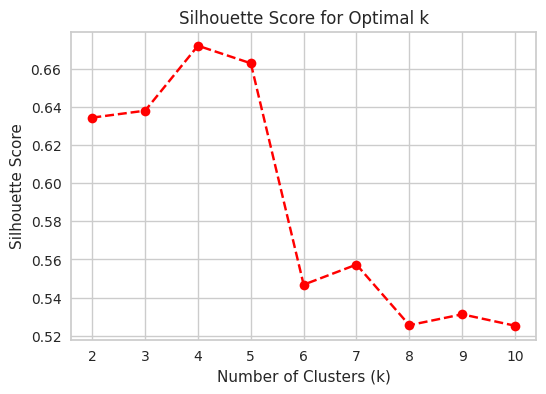

In [119]:
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, labels))

# Plot the Silhouette Score
plt.figure(figsize=(6,4))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='--', color='red')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Optimal k")
plt.show()

We can observe that the highest Silhoutte score is 0.675 for \( k = 4 \), indicating that  \( k = 4 \) will be our first choice for K-means clustering, the second highest score is 0.671 for  \( k = 5 \), therefore,  \( k = 5 \) will be our second choice for K-means. And we chose \( k = 2 \) randomly to test more dfferent K values.

By considering these three valuse \( k = 5 from the Elbow Method\ and Silhoutte Score, k = 4 from the Silhoutte Score, k = 2 randomly), we aim to explore a range of clustering outcomes, ensuring we capture diverse cluster formations and maximize the overall clustering performance.

#### Selecting the Optimal Number of Clusters (k) Using WCSS and Silhouette Score

In this section, we aim to determine the optimal number of clusters (k) for the K-Means algorithm. Instead of relying solely on the Elbow Method or the Silhouette Score, we combine both to make a more data-driven decision. This ensures that our clustering is both compact (low WCSS) and well-separated (high Silhouette Score).

To overcome the limitations of each method individually, we:
1. Compute WCSS (Elbow Method) to evaluate compactness.
2. Compute Average Silhouette Score to evaluate separation.
3. Select k where the Silhouette Score is highest, while ensuring WCSS is low enough to maintain cluster compactness.
4. Visualize both metrics together to identify the best k value based on data, not just visuals.

This balances interpretability, compactness, and separation, leading to more meaningful clusters.


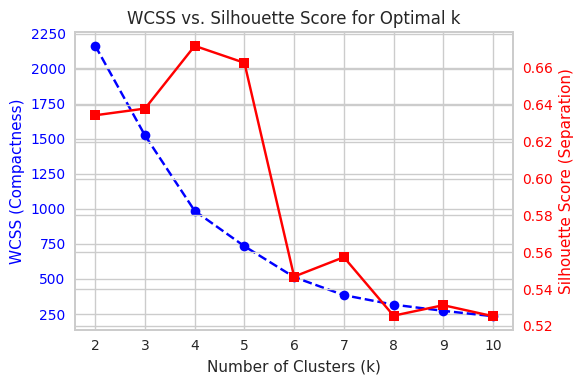

The optimal number of clusters based on Silhouette Score is: k = 4


In [120]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Define range of k values to test
k_values = range(2, 11)
wcss = []  # Store WCSS values
silhouette_scores = []  # Store silhouette scores

# Loop through different k values to compute WCSS and Silhouette Score
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)

    wcss.append(kmeans.inertia_)  # WCSS (compactness)
    silhouette_scores.append(silhouette_score(X_scaled, labels))  # Silhouette Score (separation)

# Plot WCSS and Silhouette Score together
fig, ax1 = plt.subplots(figsize=(6, 4))

# Plot WCSS (Elbow Method)
ax1.plot(k_values, wcss, marker='o', linestyle='--', label="WCSS (Inertia)", color='blue')
ax1.set_xlabel("Number of Clusters (k)")
ax1.set_ylabel("WCSS (Compactness)", color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis for Silhouette Score
ax2 = ax1.twinx()
ax2.plot(k_values, silhouette_scores, marker='s', linestyle='-', label="Silhouette Score", color='red')
ax2.set_ylabel("Silhouette Score (Separation)", color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Title and legend
plt.title("WCSS vs. Silhouette Score for Optimal k")
fig.tight_layout()
plt.show()

# Find the best k based on the highest silhouette score
optimal_k = k_values[np.argmax(silhouette_scores)]
print(f"The optimal number of clusters based on Silhouette Score is: k = {optimal_k}")


### K-Means Clustering, Visualization, and Evaluation:  

In this section, we will perform K-means clustering using the two pre-determined values for \( K \) and visualize the resulting clusters. To evaluate the performance of the clustering, we will calculate metrics such as the Within-Cluster Sum of Squares (WSS) and the average Silhouette score for each configuration. These metrics will help us assess the quality and effectiveness of the clusters.

##### k4

In [121]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

np.random.seed(8953)

# Perform K-means clustering for K=4
kmeans = KMeans(n_clusters=4, random_state=8953, n_init='auto')  # Set n_init explicitly and init='auto'
kmeans_result = kmeans.fit(X_scaled)

# Print the clustering result
print("Cluster Centers:")
print(kmeans_result.cluster_centers_)
print("\nCluster Labels:")
print(kmeans_result.labels_)

Cluster Centers:
[[-8.97955840e-02 -1.15585506e+00 -3.14103707e-01 -1.40772169e+00]
 [-4.87202951e-02  1.61191897e+00  3.82569627e+00  7.05082307e-01]
 [-9.71911978e-03  5.19071250e-01 -5.82227027e-02  7.06169686e-01]
 [ 1.78419500e+01 -1.16303440e+00 -3.14148663e-01 -1.41211738e+00]]

Cluster Labels:
[2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 0 2 2 0 2 2 2 2 2 2 2
 2 2 2 2 0 2 2 2 2 0 2 2 0 2 1 2 1 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 0 0 2 0
 0 2 0 2 2 0 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 2 0 0 2 0 0 0 0 2 0 2 0 0 0 0
 2 0 2 2 0 0 0 0 0 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 2 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 2 0 2 2 2 0 2 2 2 2 2 2
 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 2 0 0 2 2 2 0 2 2 0 0 2 0 0 0 0 0 0 0 0 2 2
 2 2 2 2 2 2 2 2 0 0 0 0 0 0 2 0 0 0 2 1 2 2 2 2 2 2 2 2 2 2 2 2 0 0 2 0 0
 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 2 2 0 2 2 2 2 0 2 2 2 2 2 2
 2 2 2 2 0 2 0 0 0 0 0 0 0 2 2 2 0 2 2 2 0 2 0 0 0 2 2 2 2 2 2 2 2 2 1 0 0
 0 0 0 0 0 0 0 0 0 0 0

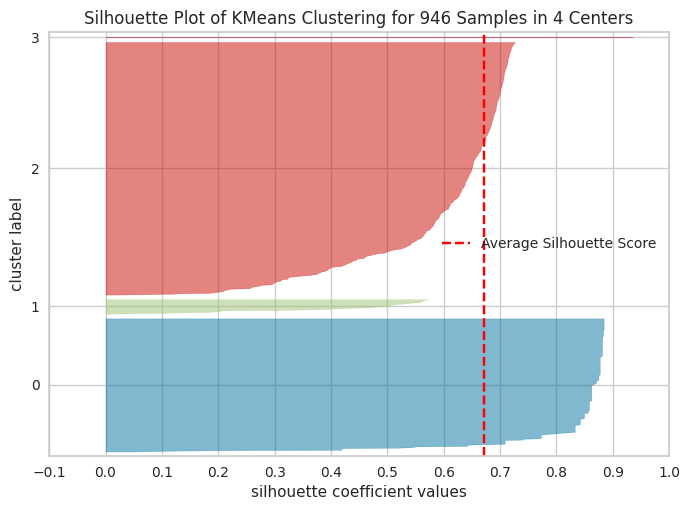

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 946 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [122]:
!pip install yellowbrick
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4,n_init='auto')
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(X_scaled)
visualizer.show()

In [123]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd


# Perform k-means clustering with k=4
kmeans = KMeans(n_clusters=4, random_state=42, n_init='auto')
kmeans.fit(X_scaled)
labels = kmeans.labels_

# Compute the WSS (Within-Cluster Sum of Squares)
wss = kmeans.inertia_

# Compute the Average Silhouette Score
silhouette_avg = silhouette_score(X, labels)

# Print the evaluation metrics
print("WSS:", wss)
print("Average Silhouette Score:", silhouette_avg)

WSS: 985.3952264360729
Average Silhouette Score: 0.02874896769772122


##### k5

In [124]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

np.random.seed(8953)

# Perform K-means clustering for K=5
kmeans = KMeans(n_clusters=5, random_state=8953, n_init='auto')  # Set n_init explicitly
kmeans_result= kmeans.fit(X_scaled)

#Print the clustering result
print("Cluster Centers:")
print(kmeans_result.cluster_centers_)
print("\nCluster Labels:")
print(kmeans_result. labels_)

Cluster Centers:
[[-8.97955840e-02 -1.15585506e+00 -3.14103707e-01 -1.40772169e+00]
 [-3.78511151e-02  1.55073460e+00  2.96862854e+00  7.07403735e-01]
 [-1.00173894e-02  5.06436112e-01 -8.16187969e-02  7.06095957e-01]
 [ 1.78419500e+01 -1.16303440e+00 -3.14148663e-01 -1.41211738e+00]
 [ 9.70154742e-03  1.81140788e+00  1.94344491e+01  6.58252512e-01]]

Cluster Labels:
[2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 0 2 2 0 2 2 2 2 2 2 2
 2 2 2 2 0 2 2 2 2 0 2 2 0 2 1 2 1 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 0 0 2 0
 0 2 0 2 2 0 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 2 0 0 2 0 0 0 0 2 0 2 0 0 0 0
 2 0 2 2 0 0 0 0 0 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 2 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 2 0 2 2 2 0 2 2 2 2 2 2
 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 2 0 0 2 2 2 0 2 2 0 0 2 0 0 0 0 0 0 0 0 2 2
 2 2 2 2 2 2 2 2 0 0 0 0 0 0 2 0 0 0 2 1 2 2 2 2 2 2 2 2 2 2 2 2 0 0 2 0 0
 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 2 2 0 2 2 2 2 0 2 2 2 2 2 2
 2 2 2 2 0 2 0 0 0 0 0 0 0 2 2

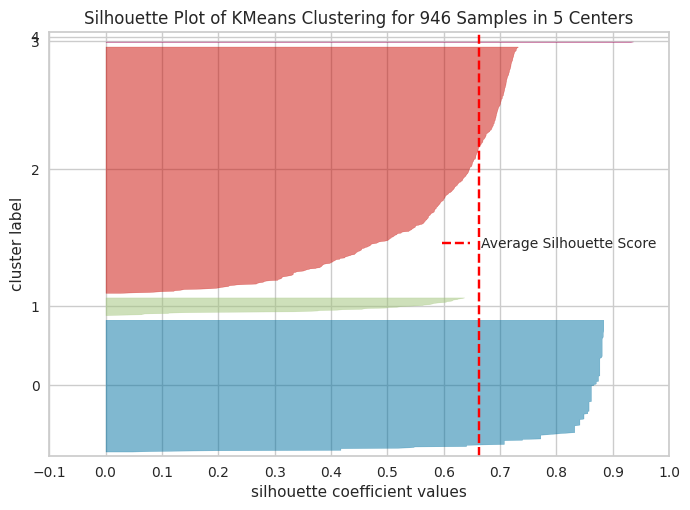

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 946 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [125]:
!pip install yellowbrick
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5,n_init='auto')
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(X_scaled)
visualizer.show()

In [126]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd


# Perform k-means clustering with k=5
kmeans = KMeans(n_clusters=5, random_state=42, n_init='auto')
kmeans.fit(X_scaled)
labels = kmeans.labels_

# Compute the WSS (Within-Cluster Sum of Squares)
wss = kmeans.inertia_

# Compute the Average Silhouette Score
silhouette_avg = silhouette_score(X, labels)

# Print the evaluation metrics
print("WSS:", wss)
print("Average Silhouette Score:", silhouette_avg)

WSS: 756.2438485557427
Average Silhouette Score: 0.08224202292070842


##### k2

In [127]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

np.random.seed(8953)

# Perform K-means clustering for K=2
kmeans = KMeans(n_clusters=2, random_state=8953, n_init='auto')  # Set n_init explicitly and init='auto'
kmeans_result = kmeans.fit(X_scaled)

# Print the clustering result
print("Cluster Centers:")
print(kmeans_result.cluster_centers_)
print("\nCluster Labels:")
print(kmeans_result.labels_)

Cluster Centers:
[[ 0.02369648 -1.1559005  -0.31410399 -1.40774951]
 [-0.01188585  0.57978501  0.15755057  0.70610928]]

Cluster Labels:
[1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0
 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0
 1 0 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1
 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 0 1 0 0 0 0 0 0 0 1 1 1 0 1 1 1 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1

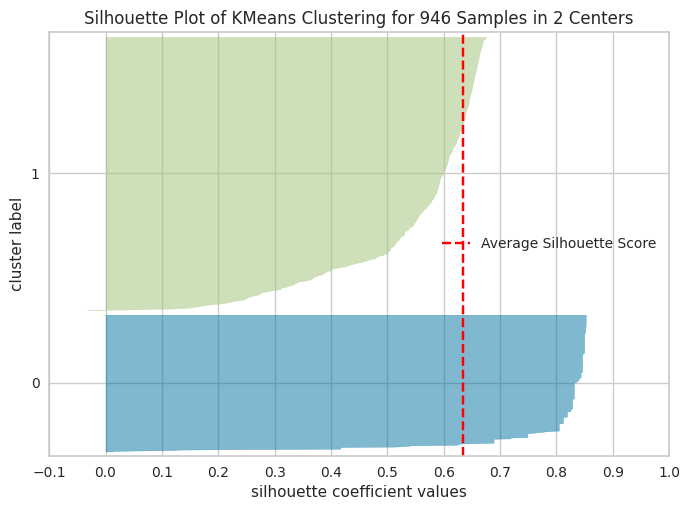

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 946 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [128]:
!pip install yellowbrick
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2,n_init='auto')
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(X_scaled)
visualizer.show()

In [129]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd


# Perform k-means clustering with k=2
kmeans = KMeans(n_clusters=2, random_state=42, n_init='auto')
kmeans.fit(X_scaled)
labels = kmeans.labels_

# Compute the WSS (Within-Cluster Sum of Squares)
wss = kmeans.inertia_

# Compute the Average Silhouette Score
silhouette_avg = silhouette_score(X, labels)

# Print the evaluation metrics
print("WSS:", wss)
print("Average Silhouette Score:", silhouette_avg)

WSS: 2162.5865689912007
Average Silhouette Score: -0.06871337489418443


**Final Choice for number of k in K-means**                               


**Summary of Results:**

| Metric                  | k=4     | k=5     |k=2     |
|-------------------------|---------|---------|-----|
| WSS                     | 985.40 | 756.24   |  2162.58  |
| Average Silhouette Score | 0.029   | 0.082   |-0.087  |


Based on the metrics we've analyzed, including WSS (Within-Cluster Sum of Squares) and the average Silhouette score, we have determined that K = 2 is the most suitable choice for our clustering model.
 This decision is supported by the fact that K = 2 provides the highest Silhouette score among the tested values, indicating better-defined clusters with higher cohesion and separation when compared to K = 5 and K = 4.

##### Applying K-means Clustering with k=2:

This will group freelancers into 2 meaningful clusters, allowing us to analyze patterns.


In [134]:
from sklearn.cluster import KMeans

# Apply K-Means with k=2
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(X_scaled)

# Display first few rows with cluster labels
df.head()


,Freelancer Name,Hourly Rate,Skills,Location,Rating,Reviews,Total Earnings,Bio,Skills Count,Cluster
0,artdjuna,30,"Data & Analytics, Design",Indonesia,4.9,171.0,8.3,make client satisfied trying hobby less exper...,2,1
1,kkwebart09,15,Design,India,4.9,17.0,6.4,expertise illustrator type depend layered des...,1,1
2,enervell,50,Development,Colombia,5.0,27.0,6.3,crafting ruby versatile including devops vuej...,1,1
3,sharminnaharm,10,Design,Bangladesh,4.9,138.0,6.8,illustrator love skill promise designing book...,1,1
4,ancineha,15,"Marketing, Engineering, Development, Data & An...",India,5.0,71.0,7.7,sentiment expertise ajax zend angularjs detec...,5,1


In [135]:
## Make sure the clusters are well-balanced and not too small or too large.

df["Cluster"].value_counts()


,count
Cluster,
1,630
0,316


In [139]:
# To compare the averages of key features per cluster to see how they differ.

# Select only numeric columns before calculating the mean
numeric_cols = df.select_dtypes(include=["number"]).columns

# Group by Cluster and compute the mean for numeric columns only
cluster_summary = df.groupby("Cluster")[numeric_cols].mean()
display(cluster_summary)


,Hourly Rate,Rating,Reviews,Total Earnings,Skills Count,Cluster
Cluster,,,,,,
0,25.588608,0.010127,0.015823,0.022785,2.170886,0.0
1,24.092063,4.910952,167.076984,5.566349,2.049206,1.0


سواليف

This tells us how clusters differ in terms of hourly rate, earnings, reviews, ratings, etc.
Helps in understanding what each cluster represents.


##### Visualizing Clusters to Validate Hypotheses

**Single Observation**
To see all relevant insights at once, we will create one figure per hypothesis, containing multiple subplots.

<ipython-input-140-aad93d6dceed>:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-140-aad93d6dceed>:23: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-140-aad93d6dceed>:53: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




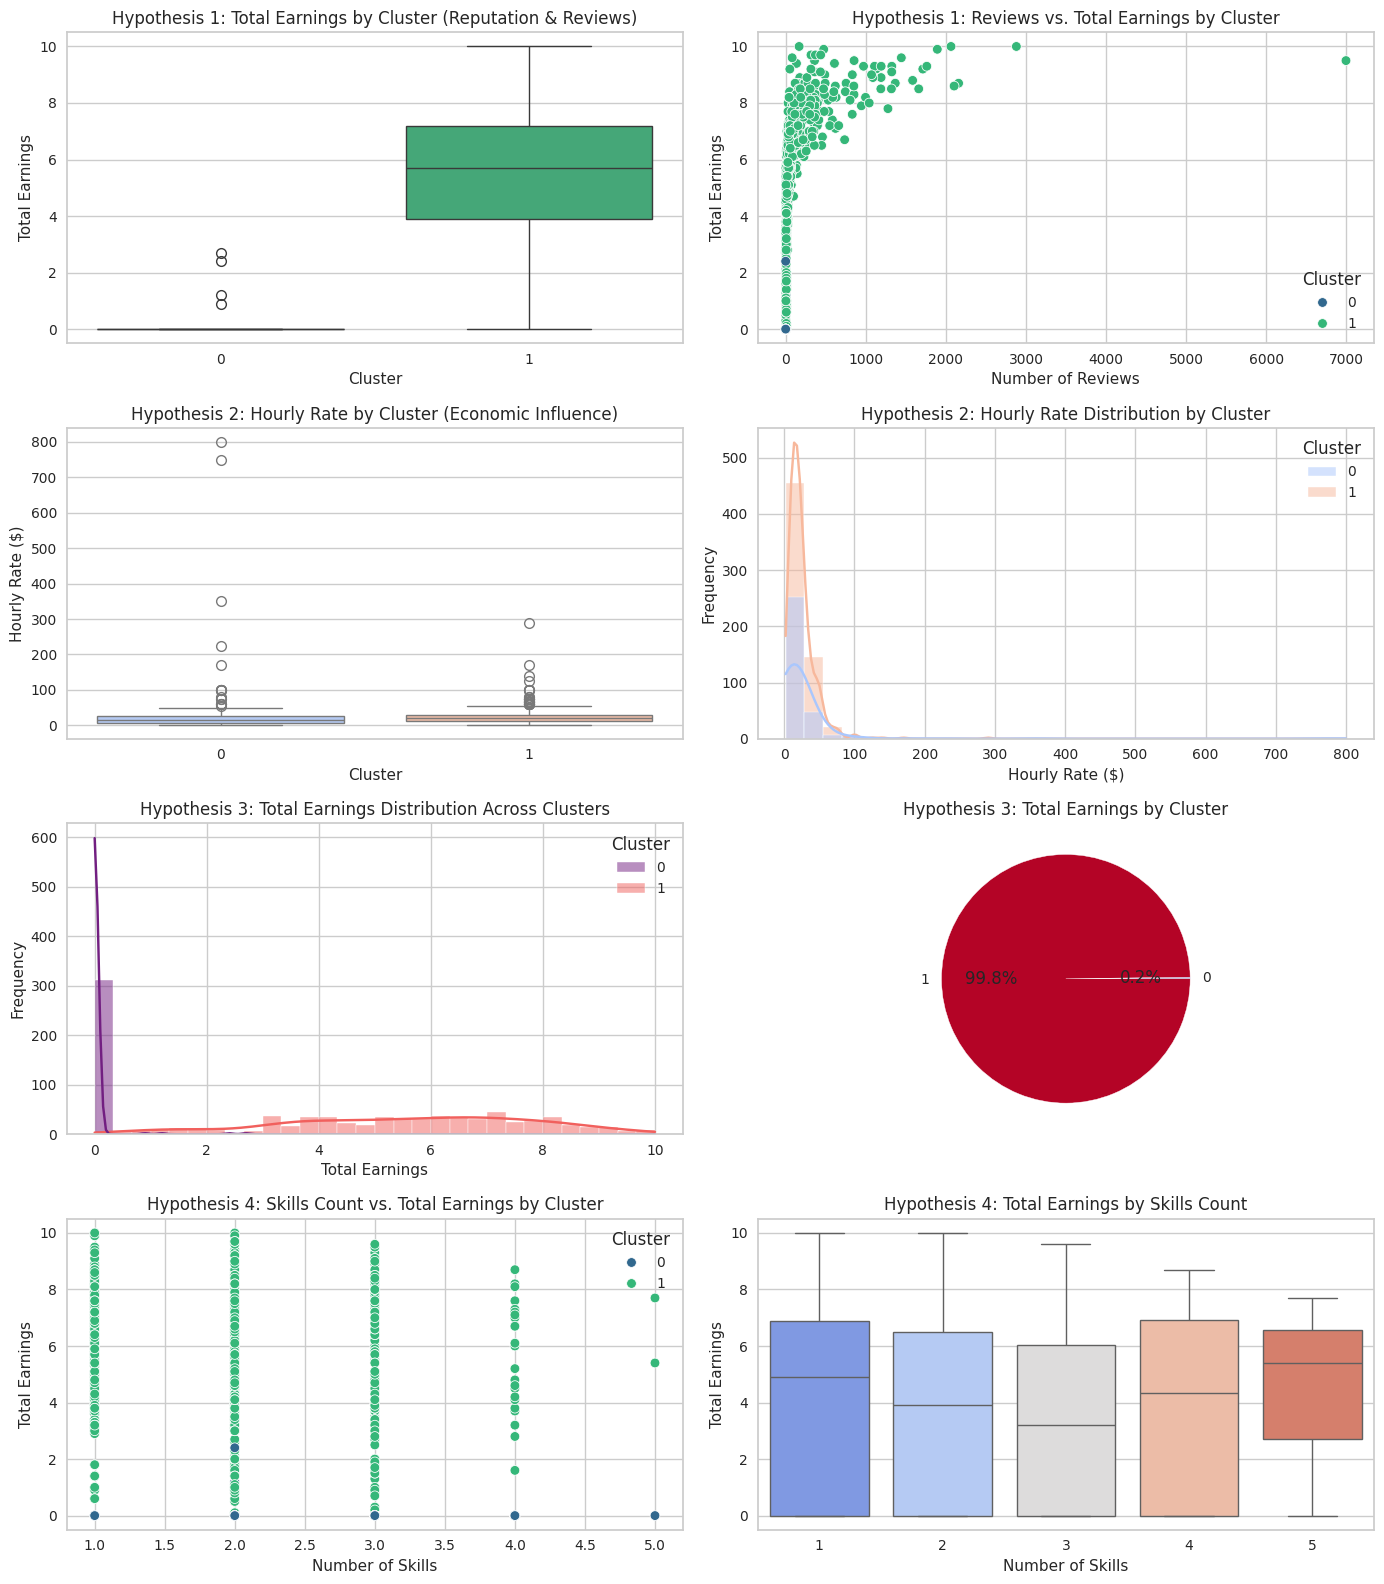

In [140]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with 4 rows (one per hypothesis) and 2 columns
fig, axes = plt.subplots(4, 2, figsize=(14, 16))

# =========================
# Hypothesis 1: Reputation & Reviews → (Row 1)
# =========================
sns.boxplot(x="Cluster", y="Total Earnings", data=df, palette="viridis", ax=axes[0, 0])
axes[0, 0].set_title("Hypothesis 1: Total Earnings by Cluster (Reputation & Reviews)")
axes[0, 0].set_xlabel("Cluster")
axes[0, 0].set_ylabel("Total Earnings")

sns.scatterplot(data=df, x="Reviews", y="Total Earnings", hue="Cluster", palette="viridis", ax=axes[0, 1])
axes[0, 1].set_title("Hypothesis 1: Reviews vs. Total Earnings by Cluster")
axes[0, 1].set_xlabel("Number of Reviews")
axes[0, 1].set_ylabel("Total Earnings")

# =========================
# Hypothesis 2: Economic Conditions & Pricing → (Row 2)
# =========================
sns.boxplot(x="Cluster", y="Hourly Rate", data=df, palette="coolwarm", ax=axes[1, 0])
axes[1, 0].set_title("Hypothesis 2: Hourly Rate by Cluster (Economic Influence)")
axes[1, 0].set_xlabel("Cluster")
axes[1, 0].set_ylabel("Hourly Rate ($)")

sns.histplot(data=df, x="Hourly Rate", hue="Cluster", bins=30, kde=True, palette="coolwarm", ax=axes[1, 1])
axes[1, 1].set_title("Hypothesis 2: Hourly Rate Distribution by Cluster")
axes[1, 1].set_xlabel("Hourly Rate ($)")
axes[1, 1].set_ylabel("Frequency")

# =========================
# Hypothesis 3: Top Freelancers Dominate → (Row 3)
# =========================
sns.histplot(data=df, x="Total Earnings", hue="Cluster", bins=30, kde=True, palette="magma", ax=axes[2, 0])
axes[2, 0].set_title("Hypothesis 3: Total Earnings Distribution Across Clusters")
axes[2, 0].set_xlabel("Total Earnings")
axes[2, 0].set_ylabel("Frequency")

df.groupby("Cluster")["Total Earnings"].sum().plot(kind="pie", autopct="%1.1f%%", cmap="coolwarm", ax=axes[2, 1])
axes[2, 1].set_title("Hypothesis 3: Total Earnings by Cluster")
axes[2, 1].set_ylabel("")  # Hide y-label for better visualization

# =========================
# Hypothesis 4: Specialization vs. Diversification → (Row 4)
# =========================
sns.scatterplot(data=df, x="Skills Count", y="Total Earnings", hue="Cluster", palette="viridis", ax=axes[3, 0])
axes[3, 0].set_title("Hypothesis 4: Skills Count vs. Total Earnings by Cluster")
axes[3, 0].set_xlabel("Number of Skills")
axes[3, 0].set_ylabel("Total Earnings")

sns.boxplot(x="Skills Count", y="Total Earnings", data=df, palette="coolwarm", ax=axes[3, 1])
axes[3, 1].set_title("Hypothesis 4: Total Earnings by Skills Count")
axes[3, 1].set_xlabel("Number of Skills")
axes[3, 1].set_ylabel("Total Earnings")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


سواليف

### **2. DBSCAN algorithem*

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is an unsupervised clustering algorithm that groups data points based on their density. Unlike K-Means, which requires specifying the number of clusters.
We used DBSCAN because it doesnt require specifing number of clusters, also it can identify noise/outliers, and we are afraid that reviews data concedered as an outlier so we find this algorithem more suitable for our data.

To perform DBSCAN clustering, we need to first identify the relevant features for each hypothesis. Then, we can preprocess the data through encoding categorical daya and transforming numeric to have scales near to each other, then we can apply DBSCAN and analyze the results.

In [113]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import DBSCAN
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA

# Load the dataset
df = pd.read_csv("https://raw.githubusercontent.com/iRoseM/Freelancing-Trends--IT362/main/Dataset/Processed_Dataset.csv")

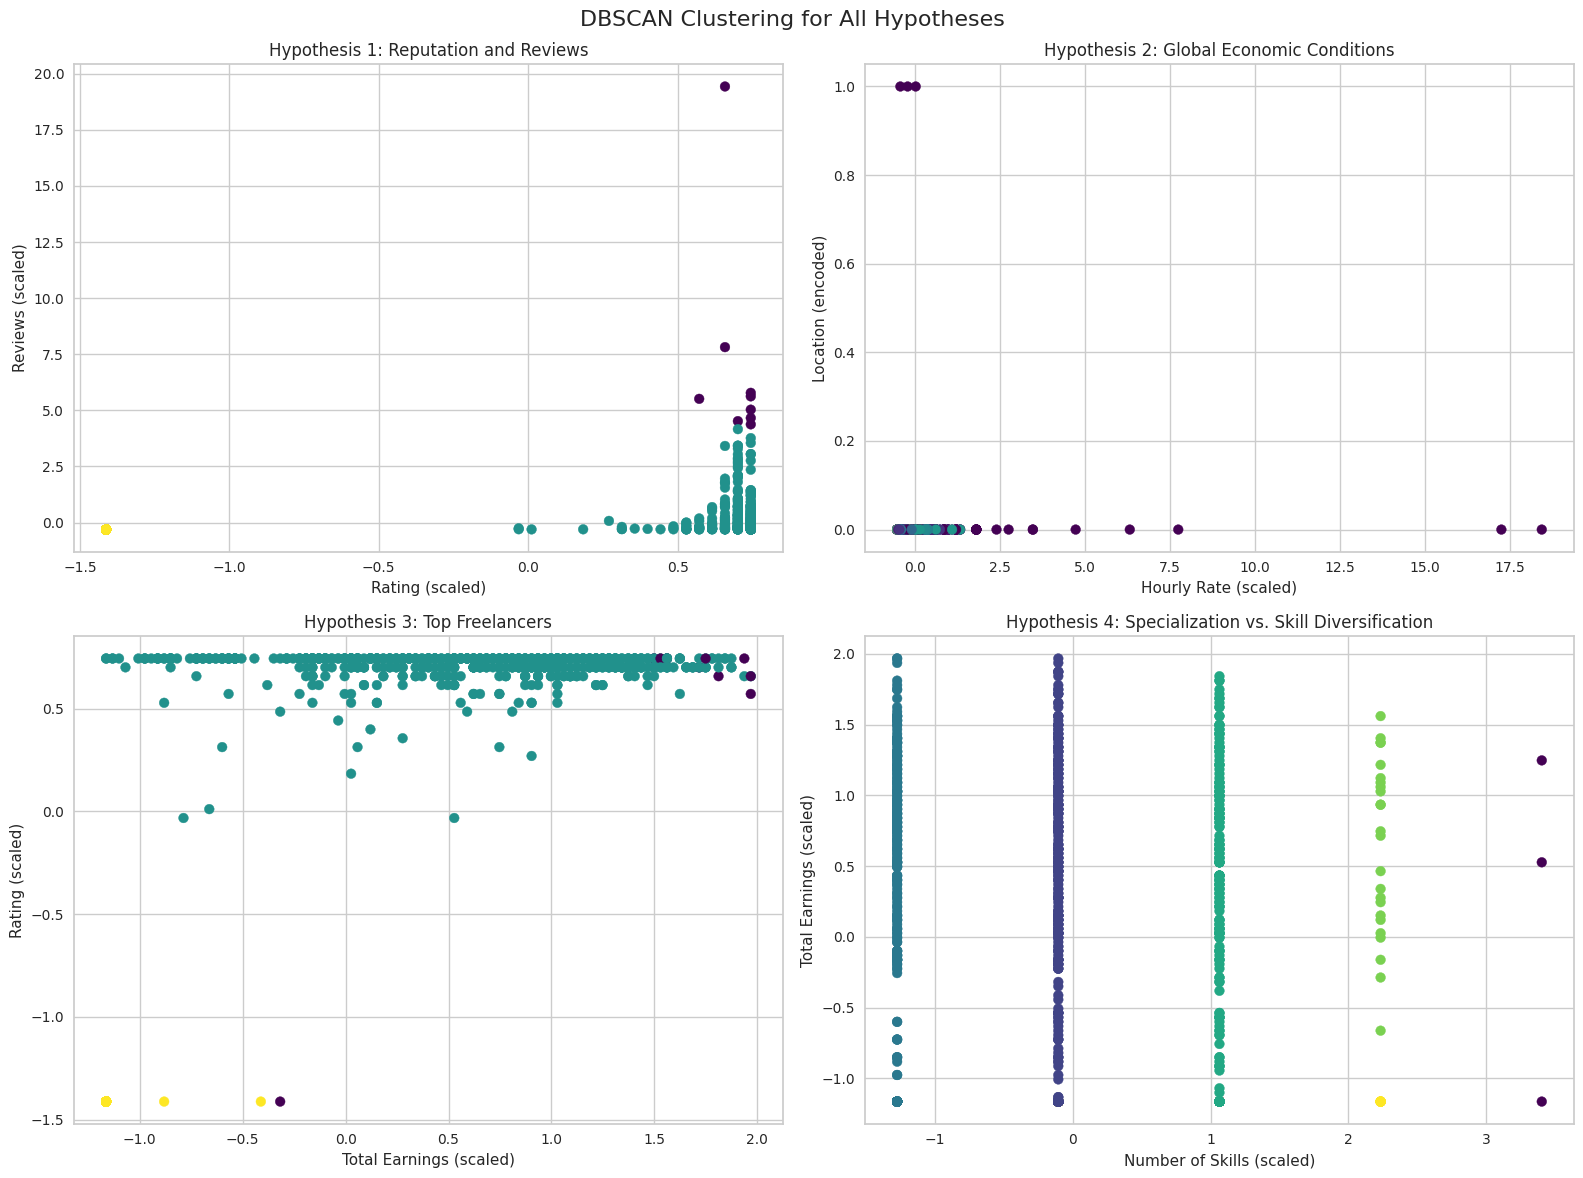

In [114]:
# Assuming df is your DataFrame
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('DBSCAN Clustering for All Hypotheses', fontsize=16)

# Hypothesis 1: Reputation and Reviews Drive Client Acquisition
# Preprocessing
df_h1 = df[['Rating', 'Reviews', 'Total Earnings']].dropna()
scaler_h1 = StandardScaler()
df_h1_scaled = scaler_h1.fit_transform(df_h1)

# DBSCAN
dbscan_h1 = DBSCAN(eps=0.5, min_samples=5)
df_h1['Cluster'] = dbscan_h1.fit_predict(df_h1_scaled)

# Visualization
scatter1 = axes[0, 0].scatter(df_h1_scaled[:, 0], df_h1_scaled[:, 1], c=df_h1['Cluster'], cmap='viridis')
axes[0, 0].set_title('Hypothesis 1: Reputation and Reviews')
axes[0, 0].set_xlabel('Rating (scaled)')
axes[0, 0].set_ylabel('Reviews (scaled)')

# Hypothesis 2: Global Economic Conditions Influence Freelance Pricing
# Preprocessing
df_h2 = df[['Hourly Rate', 'Location']].dropna()
encoder_h2 = OneHotEncoder(sparse_output=False)
df_h2_encoded = encoder_h2.fit_transform(df_h2[['Location']])
df_h2_scaled = StandardScaler().fit_transform(df_h2[['Hourly Rate']])
df_h2_final = np.hstack((df_h2_scaled, df_h2_encoded))

# DBSCAN
dbscan_h2 = DBSCAN(eps=0.5, min_samples=5)
df_h2['Cluster'] = dbscan_h2.fit_predict(df_h2_final)

# Visualization
scatter2 = axes[0, 1].scatter(df_h2_scaled[:, 0], df_h2_encoded[:, 0], c=df_h2['Cluster'], cmap='viridis')
axes[0, 1].set_title('Hypothesis 2: Global Economic Conditions')
axes[0, 1].set_xlabel('Hourly Rate (scaled)')
axes[0, 1].set_ylabel('Location (encoded)')

# Hypothesis 3: Top Freelancers Dominate the Market
# Preprocessing
df_h3 = df[['Total Earnings', 'Rating', 'Reviews']].dropna()
scaler_h3 = StandardScaler()
df_h3_scaled = scaler_h3.fit_transform(df_h3)

# DBSCAN
dbscan_h3 = DBSCAN(eps=0.5, min_samples=5)
df_h3['Cluster'] = dbscan_h3.fit_predict(df_h3_scaled)

# Visualization
scatter3 = axes[1, 0].scatter(df_h3_scaled[:, 0], df_h3_scaled[:, 1], c=df_h3['Cluster'], cmap='viridis')
axes[1, 0].set_title('Hypothesis 3: Top Freelancers')
axes[1, 0].set_xlabel('Total Earnings (scaled)')
axes[1, 0].set_ylabel('Rating (scaled)')

# Hypothesis 4: Specialization vs. Skill Diversification
# Preprocessing
df['Number_of_Skills'] = df['Skills'].apply(lambda x: len(x.split(',')) if pd.notna(x) else 0)
df_h4 = df[['Number_of_Skills', 'Total Earnings']].dropna()

# Standardize the data (DBSCAN is sensitive to scale)
scaler_h4 = StandardScaler()
df_h4_scaled = scaler_h4.fit_transform(df_h4[['Number_of_Skills', 'Total Earnings']])

# DBSCAN
dbscan_h4 = DBSCAN(eps=0.5, min_samples=5)
df_h4['Cluster'] = dbscan_h4.fit_predict(df_h4_scaled)

# Visualization
scatter4 = axes[1, 1].scatter(df_h4_scaled[:, 0], df_h4_scaled[:, 1], c=df_h4['Cluster'], cmap='viridis')
axes[1, 1].set_title('Hypothesis 4: Specialization vs. Skill Diversification')
axes[1, 1].set_xlabel('Number of Skills (scaled)')
axes[1, 1].set_ylabel('Total Earnings (scaled)')

# Adjust layout and display
plt.tight_layout()
plt.show()

We can observe that:

- Reputation and Reviews Drive Client Acquisition (Top Left)

There is a dense cluster where higher ratings correlate with more reviews.
Some freelancers (yellow points) are outliers, indicating they have extreme values in rating or reviews.

- Global Economic Conditions Influence Freelance Pricing (Top Right)

Most freelancers have low hourly rates, with some isolated points at high rates.
Clustering seems to be weak due to the sparse distribution of location-encoded values.

- Top Freelancers Dominate the Market (Bottom Left)

The majority of top-rated freelancers are clustered together.
Outliers (yellow/purple) could be low-rated freelancers with unusually high earnings.

- Specialization vs. Skill Diversification (Bottom Right)

Different clusters correspond to different skill levels.
Outliers indicate freelancers who have either very few or too many skills compared to others.

In [ ]:
from sklearn.metrics import silhouette_score

# Calculate Silhouette Score for each hypothesis
silhouette_h1 = silhouette_score(df_h1_scaled, df_h1['Cluster']) if len(np.unique(df_h1['Cluster'])) > 1 else None
silhouette_h2 = silhouette_score(df_h2_final, df_h2['Cluster']) if len(np.unique(df_h2['Cluster'])) > 1 else None
silhouette_h3 = silhouette_score(df_h3_scaled, df_h3['Cluster']) if len(np.unique(df_h3['Cluster'])) > 1 else None
silhouette_h4 = silhouette_score(df_h4_scaled, df_h4['Cluster']) if len(np.unique(df_h4['Cluster'])) > 1 else None

print(f"Silhouette Score for Hypothesis 1: {silhouette_h1}")
print(f"Silhouette Score for Hypothesis 2: {silhouette_h2}")
print(f"Silhouette Score for Hypothesis 3: {silhouette_h3}")
print(f"Silhouette Score for Hypothesis 4: {silhouette_h4}")

We can observe that:

- Hypothesis 1 (0.7368):

High score: The clusters are well-defined and distinct for this hypothesis.
Indicates that the chosen features (e.g., ratings and reviews) effectively group freelancers into meaningful clusters.


- Hypothesis 2 (0.6332):

Good score: The clusters are reasonably well-defined but may have some overlap.
Suggests that the features (e.g., hourly rates and location) provide some meaningful grouping, but there may be room for improvement.


- Hypothesis 3 (0.7368):

High score: Similar to Hypothesis 1, the clusters are well-defined and distinct.
Indicates that the features (e.g., earnings and skills) effectively group freelancers into meaningful clusters.

- Hypothesis 4 (0.2963):

Low score: The clusters are not well-separated, and there may be significant overlap.
Suggests that the chosen features (e.g., specialization vs. skill diversification) may not be effective for clustering, or the data distribution is not suitable for the chosen clustering algorithm.